# Microsoft Malware Classification Challenge 

## Multiclass classification problem 

## Description
- Microsoft is providing the data science community with an unprecedented malware dataset and encouraging open-source progress on effective techniques for grouping variants of malware files into their respective families.

## Link to kaggle dataset
https://www.kaggle.com/c/malware-classification

<ol>
<li> Add bi-grams on byte files and improve the log-loss</li>
<li> Watch the video (<a href='https://www.youtube.com/watch?v=VLQTRlLGz5Y#t=13m11s'>video</a>) to understand how to use pixel intensity features to improve the logloss </li>
</ol>

In [3]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import array
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations 
import random as r
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm 
from tqdm import tqdm_notebook as tqdm1
from sklearn.feature_extraction.text import CountVectorizer
import scipy
import timeit
import time
import array
from skimage.io import imread, imshow
from sklearn.preprocessing import MinMaxScaler

In [1]:
from pyunpack import Archive
import timeit

start = timeit.default_timer()
Archive('/home/rnaidu1427/train.7z').extractall('/home/rnaidu1427/')
stop = timeit.default_timer()
print('Time: ', (stop - start)/60)

Time:  59.163893183266666


In [7]:
start = timeit.default_timer()

source = 'train'
dest = 'byteFiles'

# we will check if the folder 'byteFiles' exists if it not there we will create a folder with the same name
if not os.path.isdir(dest):
    os.makedirs(dest)

# if we have folder called 'train' (train folder contains both .asm files and .bytes files) we will rename it 'asmFiles'
# for every file that we have in our 'asmFiles' directory we check if it is ending with .bytes, if yes we will move it to
# 'byteFiles' folder

# so by the end of this snippet we will separate all the .byte files and .asm files
if os.path.isdir(source):
    os.rename(source,'asmFiles')
    source='asmFiles'
    data_files = os.listdir(source)
    for file in data_files:
        if (file.endswith("bytes")):
            shutil.move(source+"/"+file, dest)
            
stop = timeit.default_timer()
print('Time: {0}',(stop - start) / 60)

Time: {0} 0.013658421049998044


## Bigrams on Byte Files 

In [2]:
vocab = "00,01,02,03,04,05,06,07,08,09,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??"


bigram_vocab = []

for i, v in enumerate(vocab.split(',')):
    for j in range(len(vocab.split(','))):
        bigram_vocab.append(v + ' ' +vocab.split(',')[j])

In [3]:
print('Number of bigrams: ',len(bigram_vocab))

Number of bigrams:  66049


In [14]:
folder_bytes = ['b_1', 'b_2', 'b_3', 'b_4', 'b_5', 'b_6', 'b_7', 'b_8']

for i in folder_bytes:
    if not os.path.isdir(i):
        os.makedirs(i)

In [16]:
source = 'byteFiles/'
files = os.listdir('byteFiles')
data = list(range(0,10868))

for i in range(10868):
    if i % 8 == 0:
        shutil.move(source+files[data[i]],'b_1')
    if i % 8 == 1:
        shutil.move(source+files[data[i]],'b_2')
    if i % 8 == 2:
        shutil.move(source+files[data[i]],'b_3')
    if i % 8 == 3:
        shutil.move(source+files[data[i]],'b_4')
    if i % 8 == 4:
        shutil.move(source+files[data[i]],'b_5')
    if i % 8 == 5:
        shutil.move(source+files[data[i]],'b_6')
    if i % 8 == 6:
        shutil.move(source+files[data[i]],'b_7')
    if i % 8 == 7:
        shutil.move(source+files[data[i]],'b_8')

In [20]:
print('Total byteFiles: ', (len(os.listdir('b_1')) + len(os.listdir('b_2')) + len(os.listdir('b_3')) + len(os.listdir('b_4')) + \
                                len(os.listdir('b_5')) + len(os.listdir('b_6')) + len(os.listdir('b_7')) + \
                                    len(os.listdir('b_8'))))

Total byteFiles:  10868


In [24]:
print('Byte Files in each byteFolder: ', len(os.listdir('b_1')), len(os.listdir('b_2')), len(os.listdir('b_3')), \
                                     len(os.listdir('b_4')), len(os.listdir('b_5')), len(os.listdir('b_6')), \
                                     len(os.listdir('b_7')), len(os.listdir('b_8')))

Byte Files in each byteFolder:  1359 1359 1359 1359 1358 1358 1358 1358


1359it [00:00, 37629.62it/s]


In [5]:
start = timeit.default_timer()
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_pickle.html

def firstprocess():
    print('1st running')
    vect = CountVectorizer(lowercase=False, ngram_range=(2,2), vocabulary=bigram_vocab)
    bigram_mat1 = scipy.sparse.csr_matrix((1359, 66049))
    for i, file in tqdm1(enumerate(os.listdir('b_1'))):
        f = open('b_1/' + file)
        bigram_mat1[i,:] += scipy.sparse.csr_matrix(vect.fit_transform([f.read().replace('\n', ' ').lower()]))
        f.close()
    bigram_mat1 = bigram_mat1.todense()
    bigram_df1 = pd.DataFrame(bigram_mat1, columns = bigram_vocab)    
    bigram_df1['ID'] = os.listdir('b_1')
    bigram_df1.to_pickle('bigram1.pkl')
    
def secondprocess():
    print('2nd running')
    vect = CountVectorizer(lowercase=False, ngram_range=(2,2), vocabulary=bigram_vocab)
    bigram_mat2 = scipy.sparse.csr_matrix((1359, 66049))
    for i, file in tqdm1(enumerate(os.listdir('b_2'))):
        f = open('b_2/' + file)
        bigram_mat2[i,:] += scipy.sparse.csr_matrix(vect.fit_transform([f.read().replace('\n', ' ').lower()]))
        f.close()
    bigram_mat2 = bigram_mat2.todense()
    bigram_df2 = pd.DataFrame(bigram_mat2, columns = bigram_vocab)    
    bigram_df2['ID'] = os.listdir('b_2')
    bigram_df2.to_pickle('bigram2.pkl')

    
def thirdprocess():
    print('3rd running')
    vect = CountVectorizer(lowercase=False, ngram_range=(2,2), vocabulary=bigram_vocab)
    bigram_mat3 = scipy.sparse.csr_matrix((1359, 66049))
    for i, file in tqdm1(enumerate(os.listdir('b_3'))):
        f = open('b_3/' + file)
        bigram_mat3[i,:] += scipy.sparse.csr_matrix(vect.fit_transform([f.read().replace('\n', ' ').lower()]))
        f.close()
    bigram_mat3 = bigram_mat3.todense()
    bigram_df3 = pd.DataFrame(bigram_mat3, columns = bigram_vocab)    
    bigram_df3['ID'] = os.listdir('b_3')
    bigram_df3.to_pickle('bigram3.pkl')


def fourthprocess():
    print('4th running')
    vect = CountVectorizer(lowercase=False, ngram_range=(2,2), vocabulary=bigram_vocab)
    bigram_mat4 = scipy.sparse.csr_matrix((1359, 66049))
    for i, file in tqdm1(enumerate(os.listdir('b_4'))):
        f = open('b_4/' + file)
        bigram_mat4[i,:] += scipy.sparse.csr_matrix(vect.fit_transform([f.read().replace('\n', ' ').lower()]))
        f.close()
    bigram_mat4 = bigram_mat4.todense()
    bigram_df4 = pd.DataFrame(bigram_mat4, columns = bigram_vocab)    
    bigram_df4['ID'] = os.listdir('b_4')
    bigram_df4.to_pickle('bigram4.pkl')


def fifthprocess():
    print('5th running')
    vect = CountVectorizer(lowercase=False,ngram_range=(2,2), vocabulary=bigram_vocab)
    bigram_mat5 = scipy.sparse.csr_matrix((1358, 66049))
    for i, file in tqdm1(enumerate(os.listdir('b_5'))):
        f = open('b_5/' + file)
        bigram_mat5[i,:] += scipy.sparse.csr_matrix(vect.fit_transform([f.read().replace('\n', ' ').lower()]))
        f.close()
    bigram_mat5 = bigram_mat5.todense()
    bigram_df5 = pd.DataFrame(bigram_mat5, columns = bigram_vocab)    
    bigram_df5['ID'] = os.listdir('b_5')
    bigram_df5.to_pickle('bigram5.pkl')
    
def sixthprocess():
    print('6th running')
    vect = CountVectorizer(lowercase=False,ngram_range=(2,2), vocabulary=bigram_vocab)
    bigram_mat6 = scipy.sparse.csr_matrix((1358, 66049))
    for i, file in tqdm1(enumerate(os.listdir('b_6'))):
        f = open('b_6/' + file)
        bigram_mat6[i,:] += scipy.sparse.csr_matrix(vect.fit_transform([f.read().replace('\n', ' ').lower()]))
        f.close()
    bigram_mat6 = bigram_mat6.todense()
    bigram_df6 = pd.DataFrame(bigram_mat6, columns = bigram_vocab)    
    bigram_df6['ID'] = os.listdir('b_6')
    bigram_df6.to_pickle('bigram6.pkl')
    
def seventhprocess():
    print('7th running')
    vect = CountVectorizer(lowercase=False,ngram_range=(2,2), vocabulary=bigram_vocab)
    bigram_mat7 = scipy.sparse.csr_matrix((1358, 66049))
    for i, file in tqdm1(enumerate(os.listdir('b_7'))):
        f = open('b_7/' + file)
        bigram_mat7[i,:] += scipy.sparse.csr_matrix(vect.fit_transform([f.read().replace('\n', ' ').lower()]))
        f.close()
    bigram_mat7 = bigram_mat7.todense()
    bigram_df7 = pd.DataFrame(bigram_mat7, columns = bigram_vocab)    
    bigram_df7['ID'] = os.listdir('b_7')
    bigram_df7.to_pickle('bigram7.pkl')
    
def eigthprocess():
    print('8th running')
    vect = CountVectorizer(lowercase=False,ngram_range=(2,2), vocabulary=bigram_vocab)
    bigram_mat8 = scipy.sparse.csr_matrix((1358, 66049))
    for i, file in tqdm1(enumerate(os.listdir('b_8'))):
        f = open('b_8/' + file)
        bigram_mat8[i,:] += scipy.sparse.csr_matrix(vect.fit_transform([f.read().replace('\n', ' ').lower()]))
        f.close()
    bigram_mat8 = bigram_mat8.todense()
    bigram_df8 = pd.DataFrame(bigram_mat8, columns = bigram_vocab)    
    bigram_df8['ID'] = os.listdir('b_8')
    bigram_df8.to_pickle('bigram8.pkl')
    
    
    
def main():
    #the below code is used for multiprocessing
    #the number of process depends upon the number of cores present in the System
    #process is used to call multiprocessing
    manager=multiprocessing.Manager() 
    p1=Process(target=firstprocess)
    p2=Process(target=secondprocess)
    p3=Process(target=thirdprocess)
    p4=Process(target=fourthprocess)
    p5=Process(target=fifthprocess)
    p6=Process(target=sixthprocess)
    p7=Process(target=seventhprocess)
    p8=Process(target=eigthprocess)
    
    # starting multiple processes
    p1.start()
    p2.start()
    p3.start()
    p4.start()
    p5.start()
    p6.start()
    p7.start()
    p8.start()
    
    #After completion all the processes are joined
    p1.join()
    p2.join()
    p3.join()
    p4.join()
    p5.join()
    p6.join()
    p7.join()
    p8.join()
    
if __name__=="__main__":
    main()
    
stop = timeit.default_timer()
print('Time: ', (stop - start)/60)

1st running
2nd running
3rd running
4th running
5th running
6th running
7th running
8th running










Time:  67.20714707559999


In [3]:
bigram1_df = pd.read_pickle('bigram1.pkl')
bigram2_df = pd.read_pickle('bigram2.pkl')
bigram3_df = pd.read_pickle('bigram3.pkl')
bigram4_df = pd.read_pickle('bigram4.pkl')
bigram5_df = pd.read_pickle('bigram5.pkl')
bigram6_df = pd.read_pickle('bigram6.pkl')
bigram7_df = pd.read_pickle('bigram7.pkl')
bigram8_df = pd.read_pickle('bigram8.pkl')

In [4]:
bytebigram_df = pd.concat([bigram1_df,bigram2_df,bigram3_df,bigram4_df,bigram5_df,bigram6_df,bigram7_df,bigram8_df])

In [5]:
bytebigram_df.shape

(10868, 66050)

In [6]:
bytebigram_df['ID'] = bytebigram_df['ID'].str[:-6]
bytebigram_df.head()

00 00  00 01  00 02  00 03  00 04  00 05  00 06  00 07  00 08  00 09  \
0  77198.0  857.0  529.0  495.0  588.0  426.0  390.0  418.0  396.0  364.0   
1  14107.0  580.0  183.0  169.0  572.0  553.0  571.0  171.0  566.0  158.0   
2  24561.0  315.0  113.0   84.0  125.0   35.0   25.0   86.0   98.0   93.0   
3  42795.0  603.0  241.0  700.0  264.0   77.0   33.0  112.0  187.0  134.0   
4   2622.0   16.0   10.0   17.0   10.0   10.0   10.0   10.0    8.0   25.0   

   ...  ?? f8  ?? f9  ?? fa  ?? fb  ?? fc  ?? fd  ?? fe  ?? ff  ?? ??  \
0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

                     ID  
0  gCQ70meuzrYAFaWDxZJv  
1  0gcZkSFr7VnEmLPbTxUe  
2  cuCskOh9Hatq1zUp8PYX  
3  7a5RVl9htyOJcBUK4rQm  
4  bPgcfDZ3Wrzo2SdMGT6Q  

[5 rows x 66050 columns]

In [7]:
df_size = pd.read_csv("result_with_size.csv")
df_size = df_size[['size','ID','Class']]
bytebigram_df = pd.merge(bytebigram_df, df_size, on='ID', how='left')
bytebigram_df.head()

00 00  00 01  00 02  00 03  00 04  00 05  00 06  00 07  00 08  00 09  \
0  77198.0  857.0  529.0  495.0  588.0  426.0  390.0  418.0  396.0  364.0   
1  14107.0  580.0  183.0  169.0  572.0  553.0  571.0  171.0  566.0  158.0   
2  24561.0  315.0  113.0   84.0  125.0   35.0   25.0   86.0   98.0   93.0   
3  42795.0  603.0  241.0  700.0  264.0   77.0   33.0  112.0  187.0  134.0   
4   2622.0   16.0   10.0   17.0   10.0   10.0   10.0   10.0    8.0   25.0   

   ...  ?? fa  ?? fb  ?? fc  ?? fd  ?? fe  ?? ff  ?? ??                    ID  \
0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0  gCQ70meuzrYAFaWDxZJv   
1  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0gcZkSFr7VnEmLPbTxUe   
2  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0  cuCskOh9Hatq1zUp8PYX   
3  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0  7a5RVl9htyOJcBUK4rQm   
4  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0  bPgcfDZ3Wrzo2SdMGT6Q   

       size  Class  
0  1.710693      8  
1  3.887939      9  
2  0.753662      1  
3  1.076660      1  
4  6.842773      3  

[5 rows x 66052 columns]

In [12]:
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('ID') and str(feature_name)!=str('Class') and str(feature_name)!=str('size')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            if (max_value-min_value)!=0:
                result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1
    

In [9]:
bytebigram_df = normalize(bytebigram_df)
            

In [10]:
bytebigram_df.head()

00 00     00 01     00 02     00 03     00 04     00 05     00 06  \
0  0.036016  0.068374  0.035877  0.037645  0.040513  0.045797  0.037875   
1  0.006581  0.046274  0.012411  0.012853  0.039410  0.059450  0.055453   
2  0.011459  0.025132  0.007664  0.006388  0.008612  0.003763  0.002428   
3  0.019965  0.048109  0.016345  0.053236  0.018189  0.008278  0.003205   
4  0.001223  0.001277  0.000678  0.001293  0.000689  0.001075  0.000971   

      00 07     00 08     00 09  ...  ?? fa  ?? fb  ?? fc  ?? fd  ?? fe  \
0  0.050802  0.026602  0.016408  ...    0.0    0.0    0.0    0.0    0.0   
1  0.020783  0.038022  0.007122  ...    0.0    0.0    0.0    0.0    0.0   
2  0.010452  0.006583  0.004192  ...    0.0    0.0    0.0    0.0    0.0   
3  0.013612  0.012562  0.006040  ...    0.0    0.0    0.0    0.0    0.0   
4  0.001215  0.000537  0.001127  ...    0.0    0.0    0.0    0.0    0.0   

   ?? ff  ?? ??                    ID      size  Class  
0    0.0    0.0  gCQ70meuzrYAFaWDxZJv  1.710693      8  
1    0.0    0.0  0gcZkSFr7VnEmLPbTxUe  3.887939      9  
2    0.0    0.0  cuCskOh9Hatq1zUp8PYX  0.753662      1  
3    0.0    0.0  7a5RVl9htyOJcBUK4rQm  1.076660      1  
4    0.0    0.0  bPgcfDZ3Wrzo2SdMGT6Q  6.842773      3  

[5 rows x 66052 columns]

In [5]:
# y_true_bigram = bytebigram_df.Class
# print(y_true_bigram[:5])

0    8
1    9
2    1
3    1
4    3
Name: Class, dtype: int64


In [9]:

def get_imp_features(df, df_vocab):
    y_true = df.Class
    x_train_df = df.drop(['ID', 'Class', 'size'], axis=1, inplace=False)
    feature_model = RandomForestClassifier(n_estimators = 35, verbose=10, n_jobs=-1)
    feature_model.fit(x_train_df, y_true)
    
    feature_indices = np.argsort(feature_model.feature_importances_)[::-1]
    imp_features = np.take(df_vocab, feature_indices)
    
    return imp_features

In [10]:
start = timeit.default_timer()
bigram_imp_features = get_imp_features(bytebigram_df, bigram_vocab)
stop = timeit.default_timer()
print('Time in mins: ', (stop - start)/60)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 35
building tree 2 of 35
building tree 3 of 35building tree 4 of 35
building tree 5 of 35
building tree 6 of 35

building tree 7 of 35
building tree 8 of 35
building tree 9 of 35
building tree 10 of 35
building tree 11 of 35
building tree 12 of 35
building tree 13 of 35
building tree 14 of 35
building tree 15 of 35
building tree 16 of 35


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.7s


building tree 17 of 35
building tree 18 of 35
building tree 19 of 35
building tree 20 of 35
building tree 21 of 35
building tree 22 of 35
building tree 23 of 35


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.9s


building tree 24 of 35
building tree 25 of 35
building tree 26 of 35
building tree 27 of 35
building tree 28 of 35
building tree 29 of 35
building tree 30 of 35
building tree 31 of 35
building tree 32 of 35


[Parallel(n_jobs=-1)]: Done  24 out of  35 | elapsed:    2.8s remaining:    1.3s


building tree 33 of 35
building tree 34 of 35
building tree 35 of 35


[Parallel(n_jobs=-1)]: Done  28 out of  35 | elapsed:    3.4s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  32 out of  35 | elapsed:    3.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    4.0s finished


Time in mins:  0.13738017918333678


In [11]:
len(bigram_imp_features)

66049

In [17]:
# we are just taking the top 1000 important features and adding our id, class, size features to it
# it's really important to take important features to overcome curse of dimensionality

final_bigram_imp_features = list(bigram_imp_features[:1000])
final_bigram_imp_features.append('ID')
final_bigram_imp_features.append('Class')
final_bigram_imp_features.append('size')

bytebigram_df = bytebigram_df[final_bigram_imp_features]
print('Our final bigram dataframe shape: ',bytebigram_df.shape)

Our final bigram dataframe shape:  (10868, 1003)


In [2]:
# it's better to store in pickle file as it takes very less to load than csv files
# bytebigram_df.to_pickle('bigram_df_imp_features.pkl')

bytebigram_df = pd.read_pickle('bigram_df_imp_features.pkl')
bytebigram_df.head()

a6 28     2a b3     29 2b     2a 88     71 ed     cd 2f     f5 aa  \
0  0.002262  0.000069  0.003021  0.000374  0.000058  0.004926  0.005464   
1  0.011312  0.000023  0.000755  0.000498  0.000058  0.017241  0.002732   
2  0.002262  0.000046  0.001511  0.000000  0.000000  0.004926  0.000000   
3  0.000000  0.000000  0.003021  0.000249  0.000000  0.007389  0.000000   
4  0.024887  0.000301  0.006798  0.001620  0.000192  0.036946  0.019126   

      f5 bb     25 7e     28 5d  ...     ef fc     3d 63     00 67     75 03  \
0  0.008368  0.000978  0.000403  ...  0.001918  0.000045  0.001442  0.001192   
1  0.020921  0.001955  0.001075  ...  0.002878  0.000059  0.003127  0.001550   
2  0.000000  0.000326  0.000269  ...  0.000480  0.000000  0.001929  0.003099   
3  0.004184  0.000000  0.000000  ...  0.001439  0.000030  0.001665  0.003576   
4  0.050209  0.004562  0.002015  ...  0.005755  0.000134  0.000264  0.000954   

      ef 72     00 08     13 00                    ID  Class      size  
0  0.006689  0.026602  0.001090  gCQ70meuzrYAFaWDxZJv      8  1.710693  
1  0.003344  0.038022  0.001143  0gcZkSFr7VnEmLPbTxUe      9  3.887939  
2  0.000000  0.006583  0.000125  cuCskOh9Hatq1zUp8PYX      1  0.753662  
3  0.016722  0.012562  0.000500  7a5RVl9htyOJcBUK4rQm      1  1.076660  
4  0.036789  0.000537  0.000107  bPgcfDZ3Wrzo2SdMGT6Q      3  6.842773  

[5 rows x 1003 columns]

In [55]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

In [4]:
# train test cv split

y_true_bigram = bytebigram_df.Class

X_train, X_test, y_train, y_test = train_test_split(bytebigram_df.drop(['ID','Class'], axis=1), 
                                                    y_true_bigram,stratify=y_true_bigram,test_size=0.20)

X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [5]:
print('X_train shape: {0}, y_train: {1}'.format(X_train.shape, y_train.shape))
print('X_cv shape:    {0}, y_cv:    {1}'.format(X_cv.shape, y_cv.shape))
print('X_test shape:  {0}, y_test:  {1}'.format(X_test.shape, y_test.shape))

X_train shape: (6955, 1001), y_train: (6955,)
X_cv shape:    (1739, 1001), y_cv:    (1739,)
X_test shape:  (2174, 1001), y_test:  (2174,)


<IPython.core.display.Javascript object>


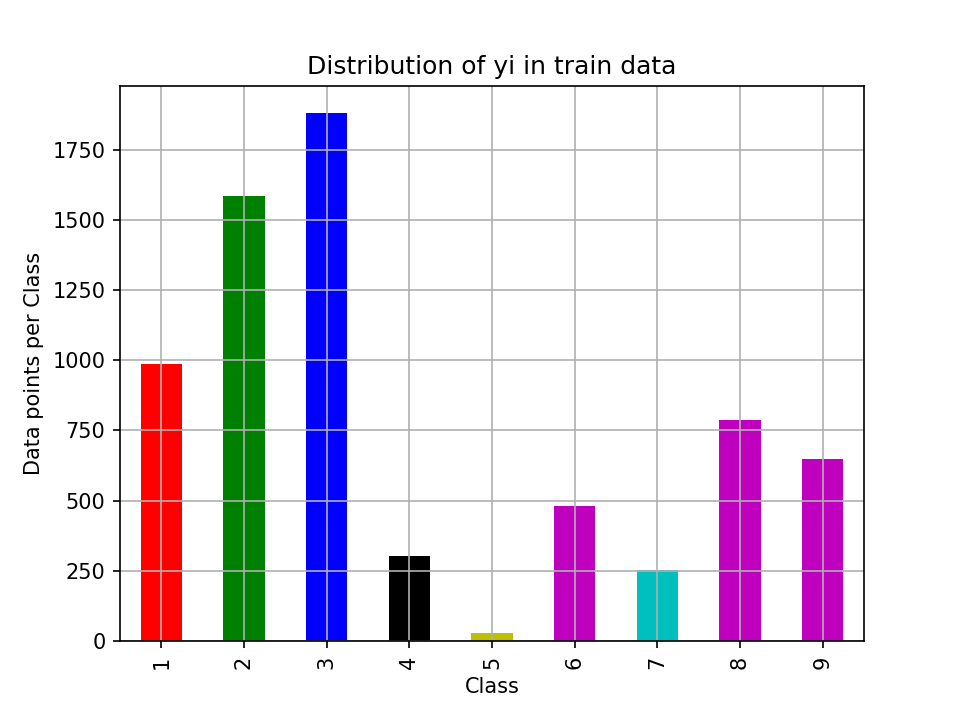

Number of data points in class 3 : 1883 ( 27.074 %)
Number of data points in class 2 : 1586 ( 22.804 %)
Number of data points in class 1 : 986 ( 14.177 %)
Number of data points in class 8 : 786 ( 11.301 %)
Number of data points in class 9 : 648 ( 9.317 %)
Number of data points in class 6 : 481 ( 6.916 %)
Number of data points in class 4 : 304 ( 4.371 %)
Number of data points in class 7 : 254 ( 3.652 %)
Number of data points in class 5 : 27 ( 0.388 %)


In [33]:
train_class_distribution = y_train.value_counts().sort_index()

# my_colors = 'rgbkymc'
my_colors = ['r','g','b','k','y','m','c','m','m']
train_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/y_train.shape[0]*100), 3), '%)')

<IPython.core.display.Javascript object>


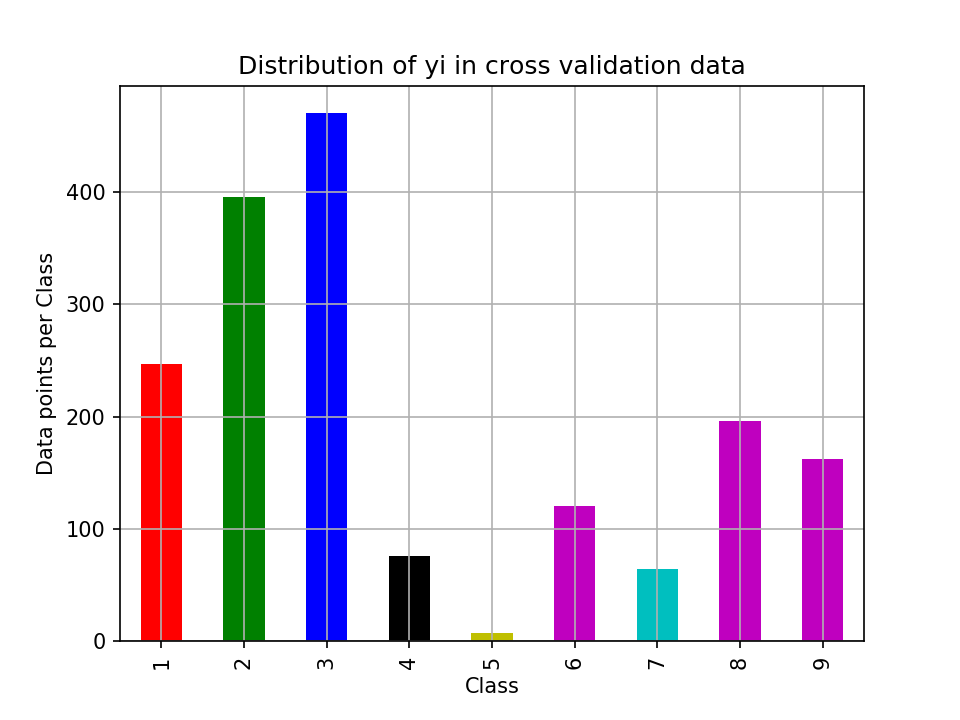

Number of data points in class 3 : 471 ( 27.085 %)
Number of data points in class 2 : 396 ( 22.772 %)
Number of data points in class 1 : 247 ( 14.204 %)
Number of data points in class 8 : 196 ( 11.271 %)
Number of data points in class 9 : 162 ( 9.316 %)
Number of data points in class 6 : 120 ( 6.901 %)
Number of data points in class 4 : 76 ( 4.37 %)
Number of data points in class 7 : 64 ( 3.68 %)
Number of data points in class 5 : 7 ( 0.403 %)


In [34]:
cv_class_distribution = y_cv.value_counts().sort_index()

cv_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/y_cv.shape[0]*100), 3), '%)')

<IPython.core.display.Javascript object>


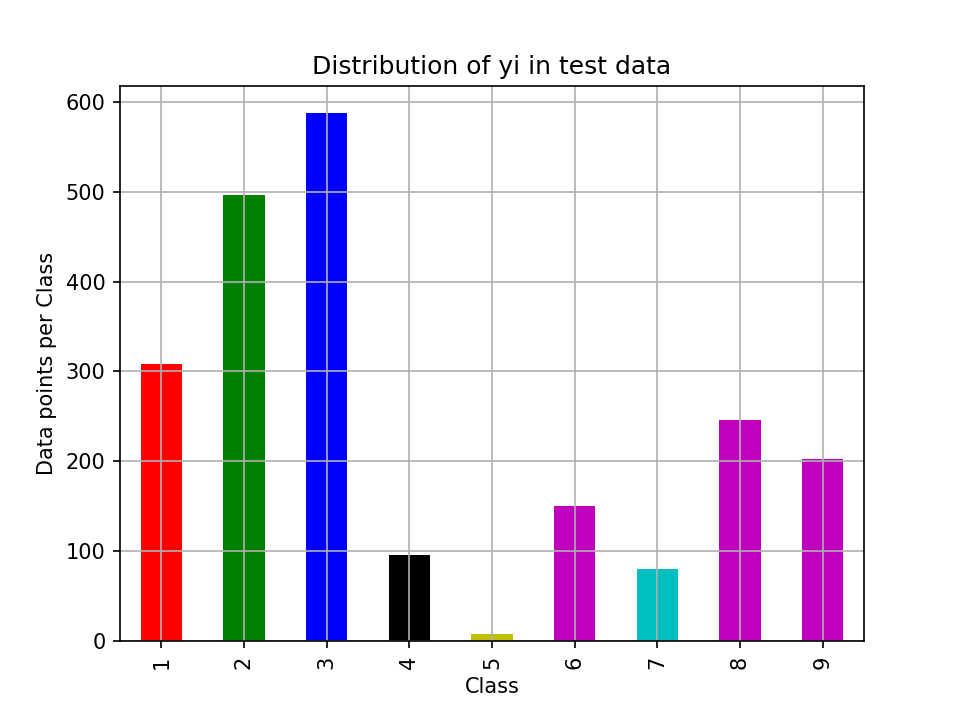

Number of data points in class 3 : 588 ( 27.047 %)
Number of data points in class 2 : 496 ( 22.815 %)
Number of data points in class 1 : 308 ( 14.167 %)
Number of data points in class 8 : 246 ( 11.316 %)
Number of data points in class 9 : 203 ( 9.338 %)
Number of data points in class 6 : 150 ( 6.9 %)
Number of data points in class 4 : 95 ( 4.37 %)
Number of data points in class 7 : 80 ( 3.68 %)
Number of data points in class 5 : 8 ( 0.368 %)


In [35]:
test_class_distribution = y_test.value_counts().sort_index()

test_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/y_test.shape[0]*100), 3), '%)')

### TSNE on bytebigrams 

<IPython.core.display.Javascript object>


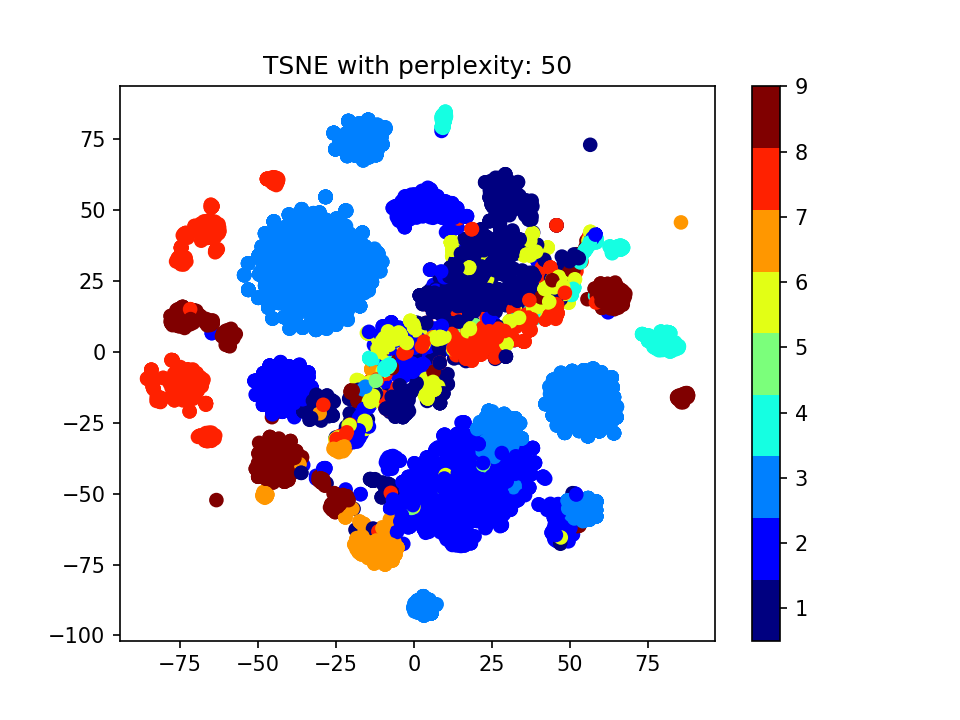

Time in mins:  2.8178740945999987


In [22]:
start = timeit.default_timer()

y_true = bytebigram_df.Class

tsne = TSNE(perplexity=50)
results = tsne.fit_transform(bytebigram_df.drop(['ID','Class'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=y_true, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.title('TSNE with perplexity: 50')
plt.show()

stop = timeit.default_timer()
print('Time in mins: ', (stop - start)/60)

<IPython.core.display.Javascript object>


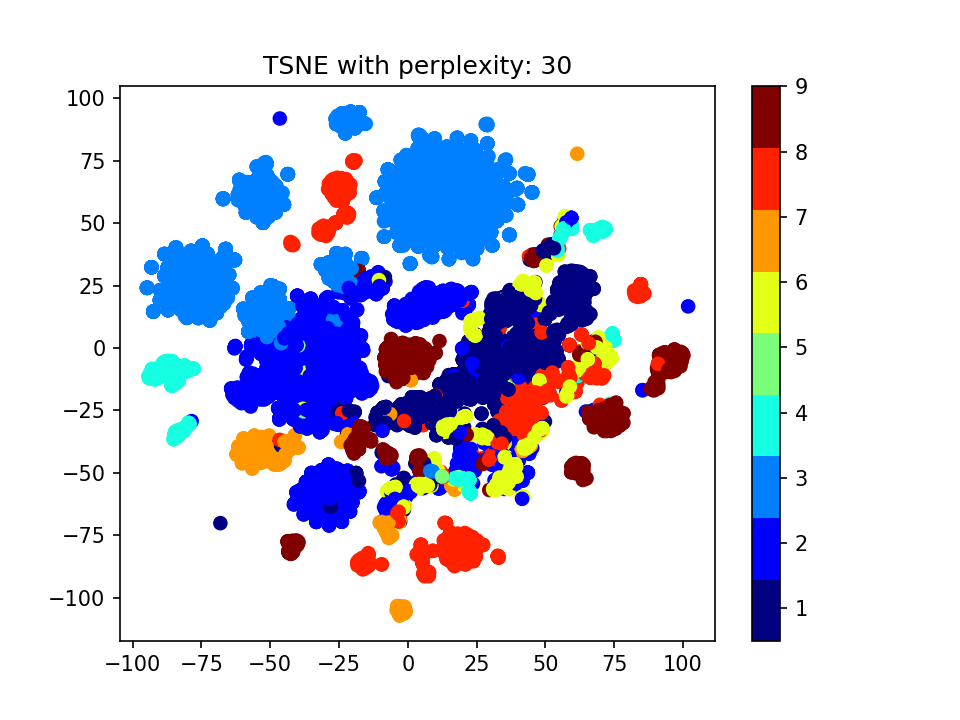

Time in mins:  2.4508808389666834


In [21]:
start = timeit.default_timer()

y_true = bytebigram_df.Class

tsne = TSNE(perplexity=30)
results = tsne.fit_transform(bytebigram_df.drop(['ID','Class'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=y_true, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.title('TSNE with perplexity: 30')
plt.show()

stop = timeit.default_timer()
print('Time in mins: ', (stop - start)/60)

### Observations:

- TSNE plot of only byte bigram features shows that our data is separated but still there is certainly a lot more overlap in the middle
- the model will be able to classify the separated such as 1, 2, 3 very well as compared to 5

### Random Forrest on bytebigrams 

Running model:  1
Running model:  2
Running model:  3
Running model:  4
Running model:  5
Running model:  6
Running model:  7
All models done

log_loss for c =  10 is 0.06863252084782438
log_loss for c =  50 is 0.05150986526518358
log_loss for c =  100 is 0.05016236894528301
log_loss for c =  500 is 0.04858804694348495
log_loss for c =  1000 is 0.0483188847515376
log_loss for c =  2000 is 0.048232040879988045
log_loss for c =  3000 is 0.04866528800496887


<IPython.core.display.Javascript object>


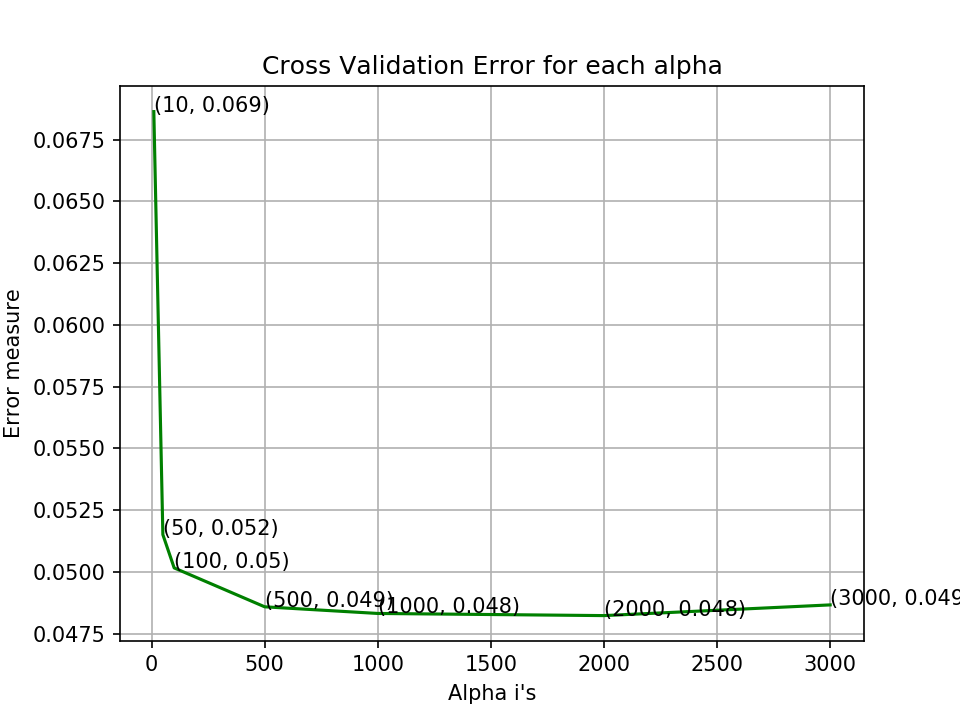

Time in mins:  3.83547795095


In [37]:
start = timeit.default_timer()


alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]


count = 1
for i in alpha:
    print('Running model: ',count)
    count += 1 
    clf = RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    clf.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

print('All models done')
print()

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

stop = timeit.default_timer()
print('Time in mins: ',(stop - start)/60)

For values of best alpha =  2000 The train log loss is: 0.016994638609398614
For values of best alpha =  2000 The cross validation log loss is: 0.048232040879988045
For values of best alpha =  2000 The test log loss is: 0.03758157763076296
Number of misclassified points  0.9199632014719411
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


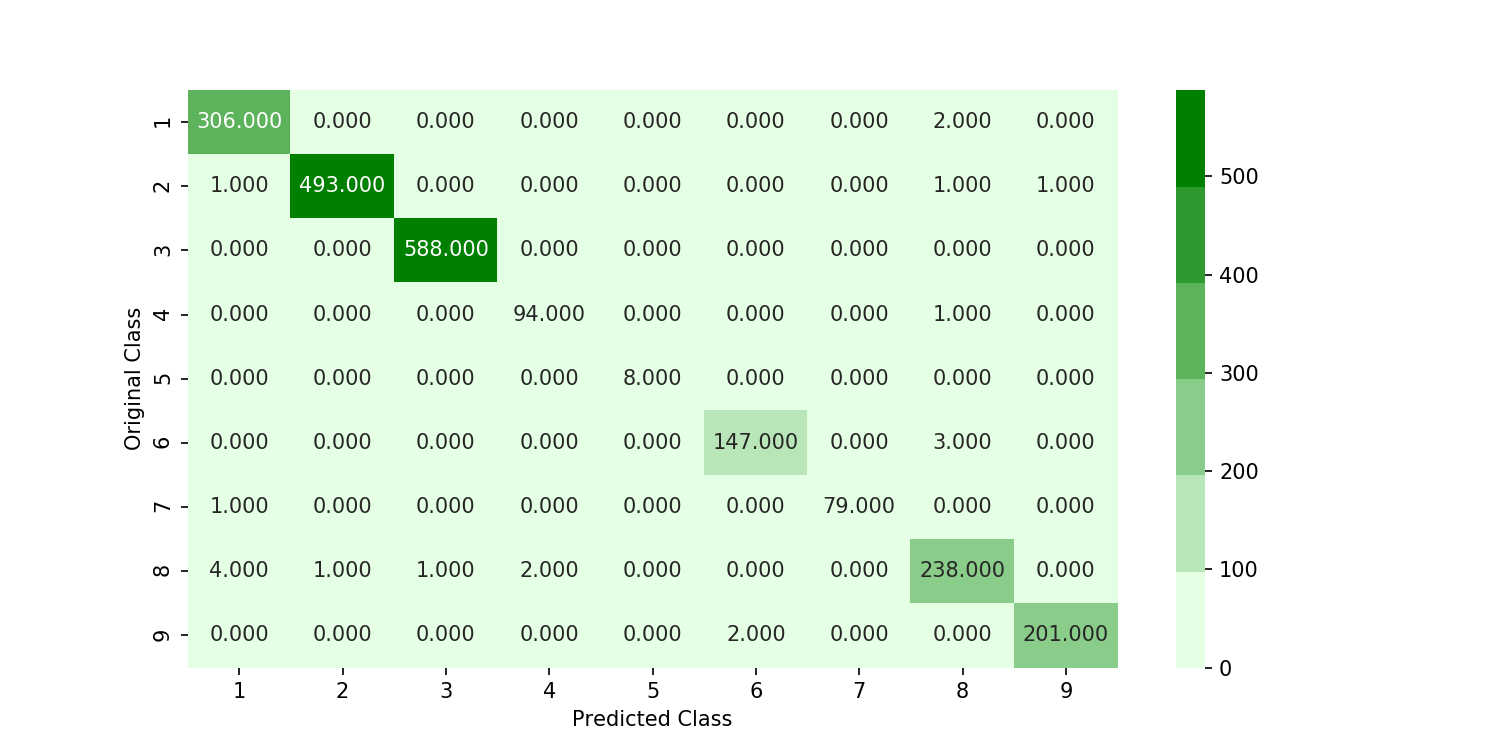

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


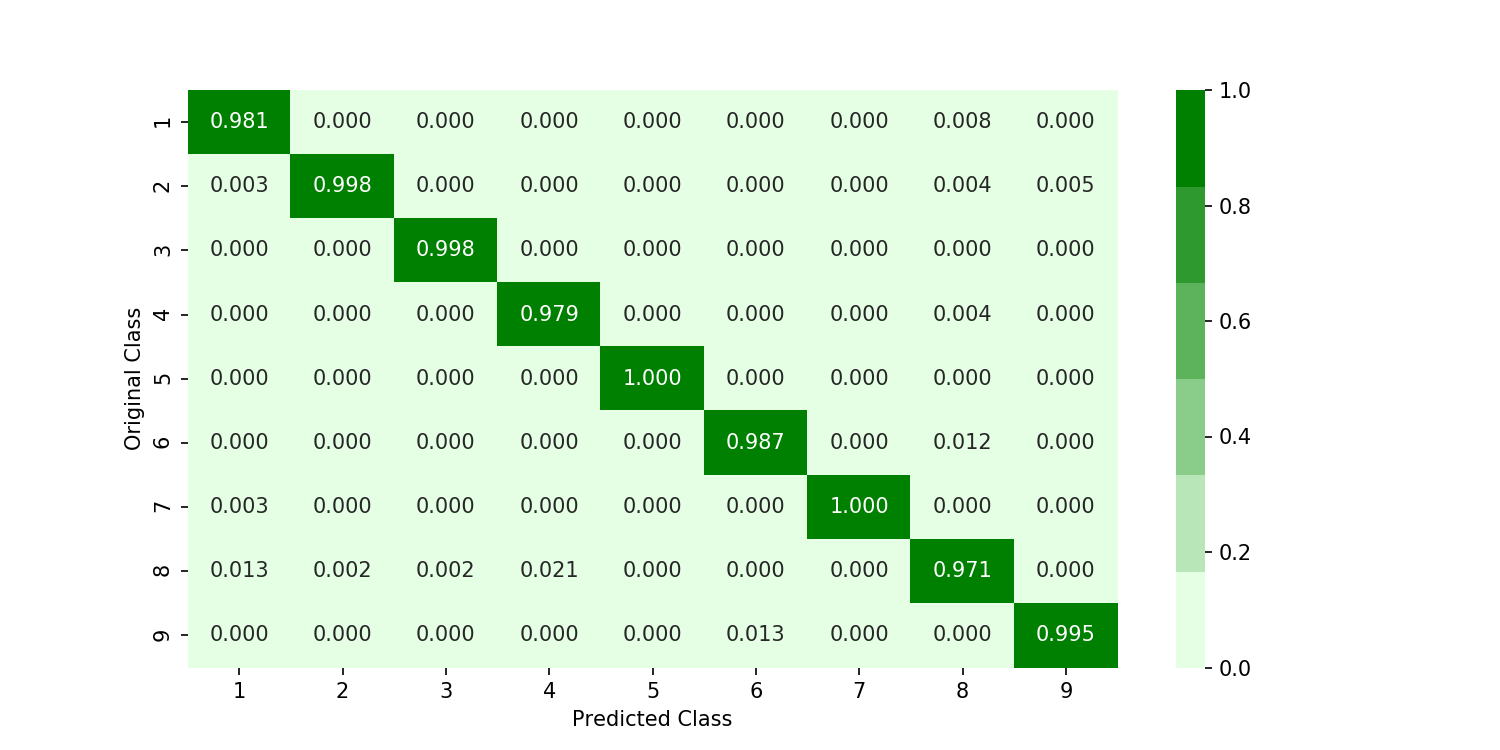

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


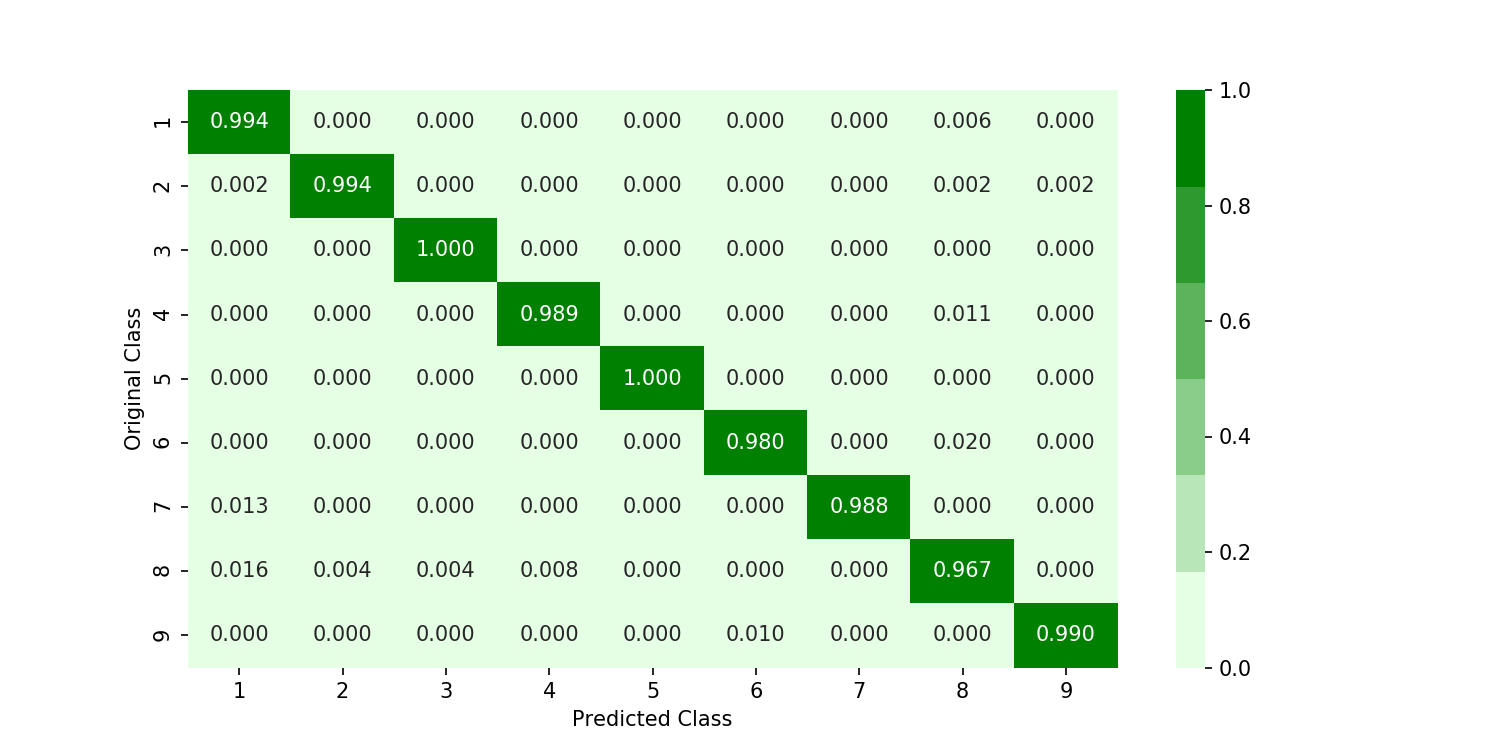

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]

Time in mins:  1.323575413499998


In [40]:
start = timeit.default_timer()

best_model = RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
best_model.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(best_model, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

print()
stop = timeit.default_timer()
print('Time in mins: ',(stop - start)/60)

## Obseravtions:

- we can see that our model is doing a good performance by looking at the precison and recall matrices


### XGBoost on bytebigrams 

In [6]:
# 
# hyperparameter tuning

params={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}

clf = XGBClassifier()
RS_clf = RandomizedSearchCV(clf, params, verbose=10, n_jobs=-1)
RS_clf.fit(X_train,y_train)



Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed: 20.0min remaining: 11.6min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed: 22.5min remaining:  6.9min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 27.1min remaining:  3.0min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 36.9min finished


KeyboardInterrupt: 

In [7]:
RS_clf.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.05,
 'max_depth': 5,
 'n_estimators': 2000,
 'subsample': 0.3}

train loss 0.01499545512596584
cv loss 0.04388648458901721
test loss 0.0447219662646629
Number of misclassified points  0.6899724011039559
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


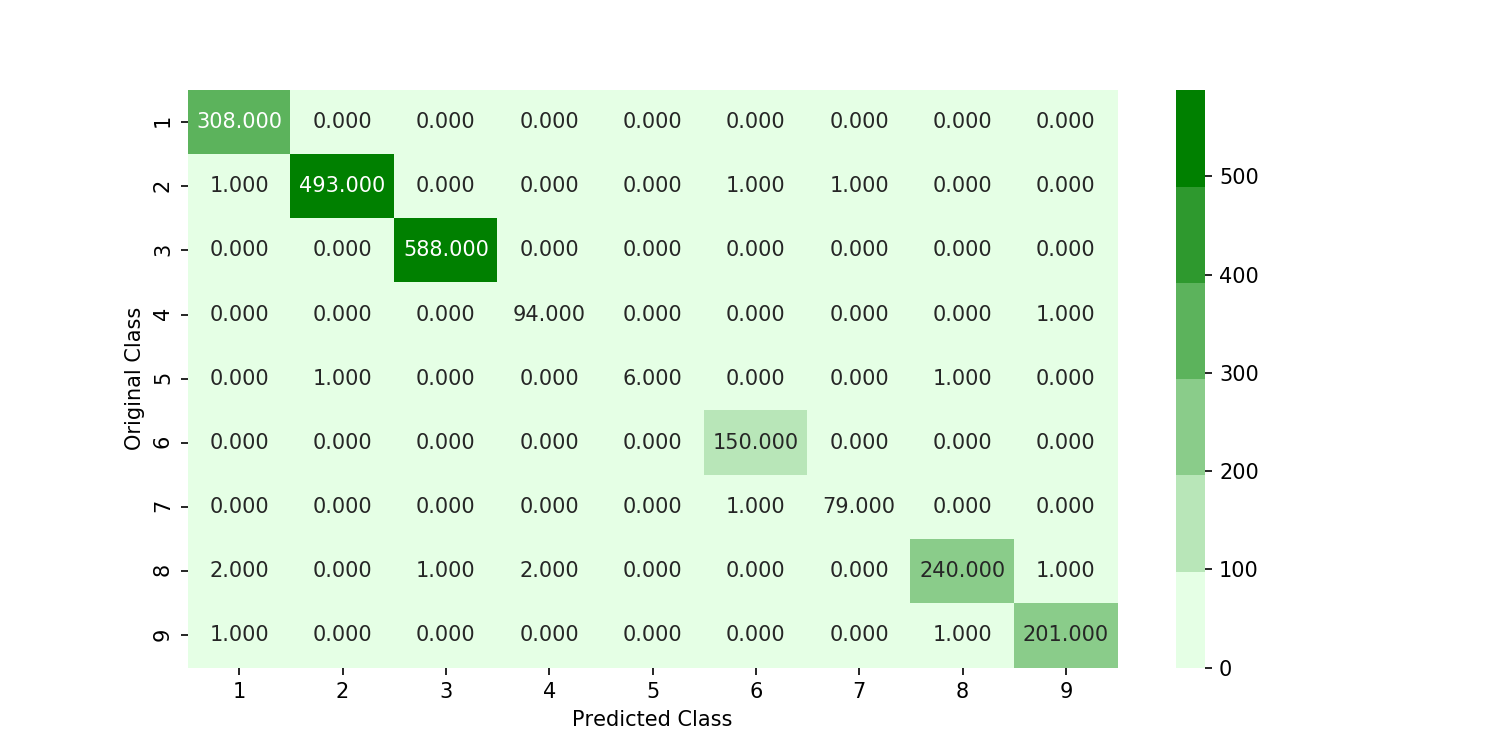

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


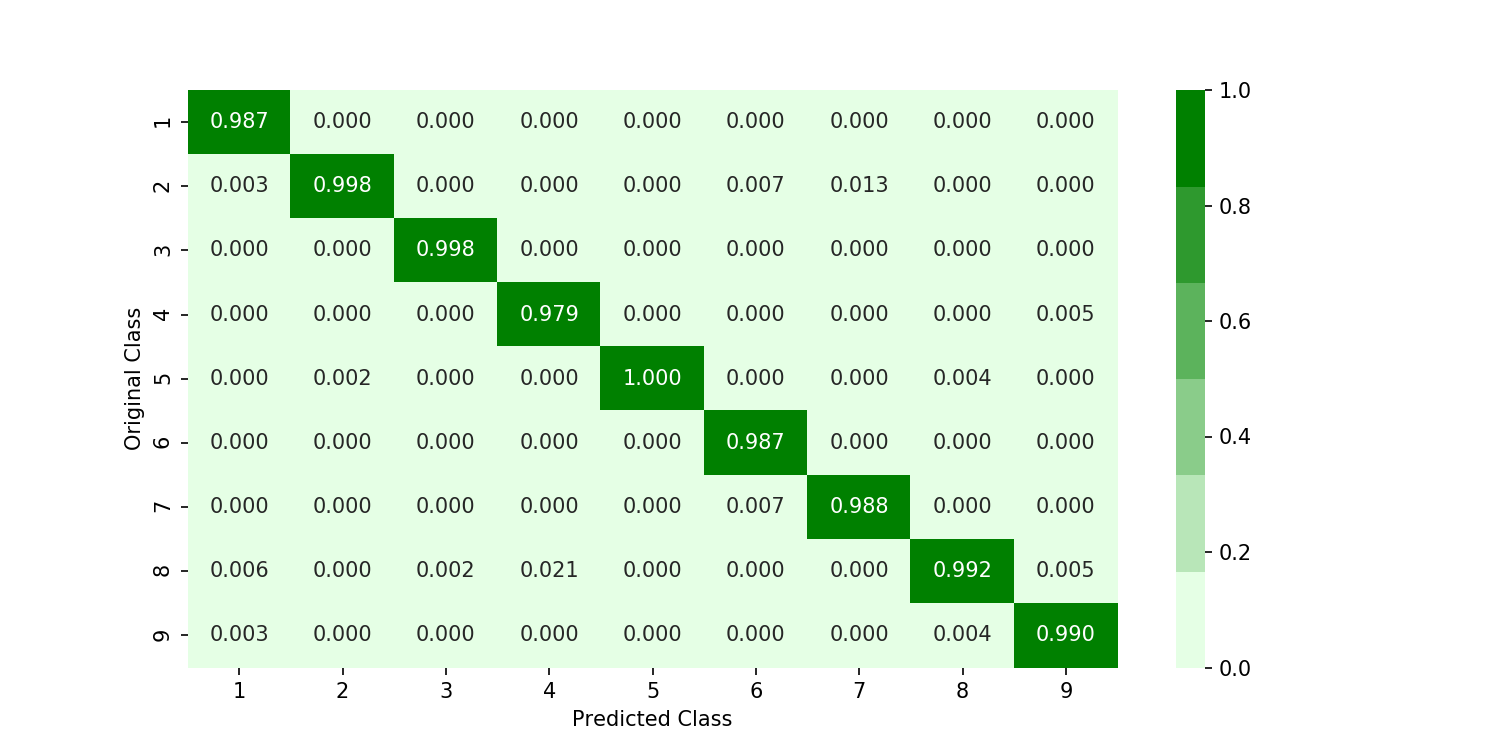

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


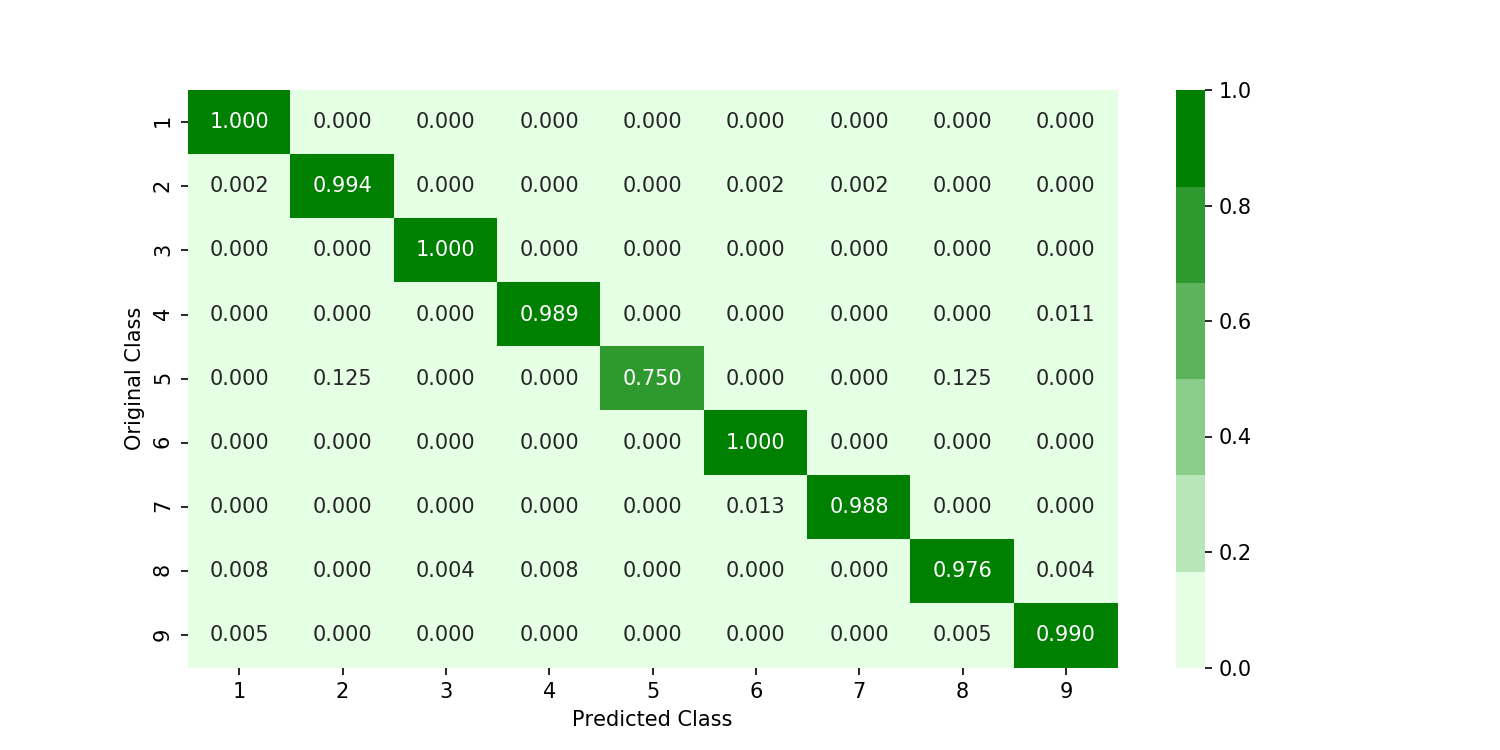

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]

Time in mins:  44.44614293894998


In [17]:
start = timeit.default_timer()

best_model_xgb = XGBClassifier(colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators= 2000, subsample=0.3, n_thread=-1)
best_model_xgb.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(best_model_xgb, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print ('train loss',log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print ('cv loss',log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print ('test loss',log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

print()
stop = timeit.default_timer()
print('Time in mins: ',(stop - start)/60)

### Observations:

- number of misclassified points has certainly decreased when we run the XGBoost model 

### Preparing our ASM files dataset for pixel intensity feature 

In [2]:
start = timeit.default_timer()

asm_df = pd.read_csv('asmoutputfile.csv')
asm_labels = pd.read_csv('trainLabels.csv')

stop = timeit.default_timer()
print('Time in mins: ', (stop - start)/60)

Time in mins:  0.0011642903500008591


In [3]:
asm_labels.columns

Index(['Id', 'Class'], dtype='object')

In [4]:
asm_df.columns

Index(['ID', 'HEADER:', '.text:', '.Pav:', '.idata:', '.data:', '.bss:',
       '.rdata:', '.edata:', '.rsrc:', '.tls:', '.reloc:', '.BSS:', '.CODE',
       'jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc',
       'dec', 'add', 'imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror',
       'rol', 'jnb', 'jz', 'rtn', 'lea', 'movzx', '.dll', 'std::', ':dword',
       'edx', 'esi', 'eax', 'ebx', 'ecx', 'edi', 'ebp', 'esp', 'eip'],
      dtype='object')

In [5]:
# we cannot merge on ID as their ID names are different 

asm_labels = asm_labels.rename(columns={'Id':'ID'})
asm_labels.head()

ID  Class
0  01kcPWA9K2BOxQeS5Rju      1
1  04EjIdbPV5e1XroFOpiN      1
2  05EeG39MTRrI6VY21DPd      1
3  05rJTUWYAKNegBk2wE8X      1
4  0AnoOZDNbPXIr2MRBSCJ      1

In [6]:
asm_df = pd.merge(asm_df, asm_labels, on='ID', how='left')

asm_df.head()  # we can see that there is no size col as it was there in for byte files

ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju       19     744      0      127      57      0   
1  1E93CpP60RHFNiT5Qfvn       17     838      0      103      49      0   
2  3ekVow2ajZHbTnBcsDfX       17     427      0       50      43      0   
3  3X2nY7iQaPBIWDrAZqJe       17     227      0       43      19      0   
4  46OZzdsSKDCFV8h7XWxf       17     402      0       59     170      0   

   .rdata:  .edata:  .rsrc:  ...  edx  esi  eax  ebx  ecx  edi  ebp  esp  eip  \
0      323        0       3  ...   18   66   15   43   83    0   17   48   29   
1        0        0       3  ...   18   29   48   82   12    0   14    0   20   
2      145        0       3  ...   13   42   10   67   14    0   11    0    9   
3        0        0       3  ...    6    8   14    7    2    0    8    0    6   
4        0        0       3  ...   12    9   18   29    5    0   11    0   11   

   Class  
0      1  
1      1  
2      1  
3      1  
4      1  

[5 rows x 53 columns]

In [17]:
# if os.listdir('asmFiles'):
#     print('yes')

yes


In [7]:
# get's you the size of either bytefiles or asmfiles

def get_size(df, file_name):
    
    files = os.listdir(str(file_name))
    filenames = df['ID'].tolist()
    class_y = df['Class'].tolist()
    class_bytes=[]
    sizebytes=[]
    fnames=[]
    for file in files:
        statinfo = os.stat(str(file_name)+'/'+file)
        # split the file name at '.' and take the first part of it i.e the file name
        f_name = file.split('.')[0]
        if any(f_name == filename for filename in filenames):
            i = filenames.index(f_name)
            class_bytes.append(class_y[i])
            sizebytes.append(statinfo.st_size/(1024.0*1024.0))  # converting into bytes
            fnames.append(f_name)
    
    res_df = pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
    
    return res_df

In [8]:
asm_size = get_size(asm_df, 'asmFiles')

In [9]:
asm_size.head()

Class                    ID       size
0      2  0Hlm4XgE1cQhC6BkMays  86.737548
1      1  EhSAMWFg7Uk5oqBfNlcC   0.163097
2      1  1Rr0hWX8Qz6nm3IgYLuF   3.073788
3      3  5cXoH4pnaQFISUNl1DsR   0.156347
4      4  HuqJS8CAp24F1aWeLtIo   4.153453

In [16]:
asm_df = pd.merge(asm_df, asm_size.drop(['Class'], axis=1), on='ID', how='left')


In [14]:
# asm_df.to_pickle('asm_df_size.pkl')

asm_df = pd.read_pickle('asm_df_size.pkl')

asm_df.head()

ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju       19     744      0      127      57      0   
1  1E93CpP60RHFNiT5Qfvn       17     838      0      103      49      0   
2  3ekVow2ajZHbTnBcsDfX       17     427      0       50      43      0   
3  3X2nY7iQaPBIWDrAZqJe       17     227      0       43      19      0   
4  46OZzdsSKDCFV8h7XWxf       17     402      0       59     170      0   

   .rdata:  .edata:  .rsrc:  ...  esi  eax  ebx  ecx  edi  ebp  esp  eip  \
0      323        0       3  ...   66   15   43   83    0   17   48   29   
1        0        0       3  ...   29   48   82   12    0   14    0   20   
2      145        0       3  ...   42   10   67   14    0   11    0    9   
3        0        0       3  ...    8   14    7    2    0    8    0    6   
4        0        0       3  ...    9   18   29    5    0   11    0   11   

   Class      size  
0      1  0.078190  
1      1  0.063400  
2      1  0.041695  
3      1  0.018757  
4      1  0.037567  

[5 rows x 54 columns]

In [6]:
# converting asm_files to images
# make sure to create a new folder in the directory for asm images
# be patient while running this code it took me 3 hours and 6 mins 

# https://www.youtube.com/watch?v=VLQTRlLGz5Y&t=918s
def file_to_image_asm():
    count = 1
    for asmfile in os.listdir("asmFiles"):
        filename = asmfile.split('.')[0]
        file = codecs.open("asmFiles/" + asmfile, 'rb')  # decodes asm to bytes
        filelen = os.path.getsize("asmFiles/" + asmfile) # size of the file
        width = int(filelen ** 0.5) # calculates width of the file
        rem = int(filelen / width)
        arr = array.array('B')   # an empty unsigned char array
        arr.frombytes(file.read()) # adding bytes representation of file to arr
        file.close()
        reshaped = np.reshape(arr[:width * width], (width, width))  # creating the shape of your image
        reshaped = np.uint8(reshaped)     # the whole image values are converted into 8bit unsigned int
        imageio.imwrite('asm_image/' + filename + '.png',reshaped)  # i've created a new folder and adding to that
        print('{0} files converted'.format(count))
        count += 1
        

In [7]:
start = timeit.default_timer()

file_to_image_asm()
stop = timeit.default_timer()
print('Time in mins: ', (stop - start)/60)

1 files converted
2 files converted
3 files converted
4 files converted
5 files converted
6 files converted
7 files converted
8 files converted
9 files converted
10 files converted
11 files converted
12 files converted
13 files converted
14 files converted
15 files converted
16 files converted
17 files converted
18 files converted
19 files converted
20 files converted
21 files converted
22 files converted
23 files converted
24 files converted
25 files converted
26 files converted
27 files converted
28 files converted
29 files converted
30 files converted
31 files converted
32 files converted
33 files converted
34 files converted
35 files converted
36 files converted
37 files converted
38 files converted
39 files converted
40 files converted
41 files converted
42 files converted
43 files converted
44 files converted
45 files converted
46 files converted
47 files converted
48 files converted
49 files converted
50 files converted
51 files converted
52 files converted
53 files converted
54

417 files converted
418 files converted
419 files converted
420 files converted
421 files converted
422 files converted
423 files converted
424 files converted
425 files converted
426 files converted
427 files converted
428 files converted
429 files converted
430 files converted
431 files converted
432 files converted
433 files converted
434 files converted
435 files converted
436 files converted
437 files converted
438 files converted
439 files converted
440 files converted
441 files converted
442 files converted
443 files converted
444 files converted
445 files converted
446 files converted
447 files converted
448 files converted
449 files converted
450 files converted
451 files converted
452 files converted
453 files converted
454 files converted
455 files converted
456 files converted
457 files converted
458 files converted
459 files converted
460 files converted
461 files converted
462 files converted
463 files converted
464 files converted
465 files converted
466 files converted


831 files converted
832 files converted
833 files converted
834 files converted
835 files converted
836 files converted
837 files converted
838 files converted
839 files converted
840 files converted
841 files converted
842 files converted
843 files converted
844 files converted
845 files converted
846 files converted
847 files converted
848 files converted
849 files converted
850 files converted
851 files converted
852 files converted
853 files converted
854 files converted
855 files converted
856 files converted
857 files converted
858 files converted
859 files converted
860 files converted
861 files converted
862 files converted
863 files converted
864 files converted
865 files converted
866 files converted
867 files converted
868 files converted
869 files converted
870 files converted
871 files converted
872 files converted
873 files converted
874 files converted
875 files converted
876 files converted
877 files converted
878 files converted
879 files converted
880 files converted


1230 files converted
1231 files converted
1232 files converted
1233 files converted
1234 files converted
1235 files converted
1236 files converted
1237 files converted
1238 files converted
1239 files converted
1240 files converted
1241 files converted
1242 files converted
1243 files converted
1244 files converted
1245 files converted
1246 files converted
1247 files converted
1248 files converted
1249 files converted
1250 files converted
1251 files converted
1252 files converted
1253 files converted
1254 files converted
1255 files converted
1256 files converted
1257 files converted
1258 files converted
1259 files converted
1260 files converted
1261 files converted
1262 files converted
1263 files converted
1264 files converted
1265 files converted
1266 files converted
1267 files converted
1268 files converted
1269 files converted
1270 files converted
1271 files converted
1272 files converted
1273 files converted
1274 files converted
1275 files converted
1276 files converted
1277 files co

1621 files converted
1622 files converted
1623 files converted
1624 files converted
1625 files converted
1626 files converted
1627 files converted
1628 files converted
1629 files converted
1630 files converted
1631 files converted
1632 files converted
1633 files converted
1634 files converted
1635 files converted
1636 files converted
1637 files converted
1638 files converted
1639 files converted
1640 files converted
1641 files converted
1642 files converted
1643 files converted
1644 files converted
1645 files converted
1646 files converted
1647 files converted
1648 files converted
1649 files converted
1650 files converted
1651 files converted
1652 files converted
1653 files converted
1654 files converted
1655 files converted
1656 files converted
1657 files converted
1658 files converted
1659 files converted
1660 files converted
1661 files converted
1662 files converted
1663 files converted
1664 files converted
1665 files converted
1666 files converted
1667 files converted
1668 files co

2013 files converted
2014 files converted
2015 files converted
2016 files converted
2017 files converted
2018 files converted
2019 files converted
2020 files converted
2021 files converted
2022 files converted
2023 files converted
2024 files converted
2025 files converted
2026 files converted
2027 files converted
2028 files converted
2029 files converted
2030 files converted
2031 files converted
2032 files converted
2033 files converted
2034 files converted
2035 files converted
2036 files converted
2037 files converted
2038 files converted
2039 files converted
2040 files converted
2041 files converted
2042 files converted
2043 files converted
2044 files converted
2045 files converted
2046 files converted
2047 files converted
2048 files converted
2049 files converted
2050 files converted
2051 files converted
2052 files converted
2053 files converted
2054 files converted
2055 files converted
2056 files converted
2057 files converted
2058 files converted
2059 files converted
2060 files co

2404 files converted
2405 files converted
2406 files converted
2407 files converted
2408 files converted
2409 files converted
2410 files converted
2411 files converted
2412 files converted
2413 files converted
2414 files converted
2415 files converted
2416 files converted
2417 files converted
2418 files converted
2419 files converted
2420 files converted
2421 files converted
2422 files converted
2423 files converted
2424 files converted
2425 files converted
2426 files converted
2427 files converted
2428 files converted
2429 files converted
2430 files converted
2431 files converted
2432 files converted
2433 files converted
2434 files converted
2435 files converted
2436 files converted
2437 files converted
2438 files converted
2439 files converted
2440 files converted
2441 files converted
2442 files converted
2443 files converted
2444 files converted
2445 files converted
2446 files converted
2447 files converted
2448 files converted
2449 files converted
2450 files converted
2451 files co

2795 files converted
2796 files converted
2797 files converted
2798 files converted
2799 files converted
2800 files converted
2801 files converted
2802 files converted
2803 files converted
2804 files converted
2805 files converted
2806 files converted
2807 files converted
2808 files converted
2809 files converted
2810 files converted
2811 files converted
2812 files converted
2813 files converted
2814 files converted
2815 files converted
2816 files converted
2817 files converted
2818 files converted
2819 files converted
2820 files converted
2821 files converted
2822 files converted
2823 files converted
2824 files converted
2825 files converted
2826 files converted
2827 files converted
2828 files converted
2829 files converted
2830 files converted
2831 files converted
2832 files converted
2833 files converted
2834 files converted
2835 files converted
2836 files converted
2837 files converted
2838 files converted
2839 files converted
2840 files converted
2841 files converted
2842 files co

3186 files converted
3187 files converted
3188 files converted
3189 files converted
3190 files converted
3191 files converted
3192 files converted
3193 files converted
3194 files converted
3195 files converted
3196 files converted
3197 files converted
3198 files converted
3199 files converted
3200 files converted
3201 files converted
3202 files converted
3203 files converted
3204 files converted
3205 files converted
3206 files converted
3207 files converted
3208 files converted
3209 files converted
3210 files converted
3211 files converted
3212 files converted
3213 files converted
3214 files converted
3215 files converted
3216 files converted
3217 files converted
3218 files converted
3219 files converted
3220 files converted
3221 files converted
3222 files converted
3223 files converted
3224 files converted
3225 files converted
3226 files converted
3227 files converted
3228 files converted
3229 files converted
3230 files converted
3231 files converted
3232 files converted
3233 files co

3577 files converted
3578 files converted
3579 files converted
3580 files converted
3581 files converted
3582 files converted
3583 files converted
3584 files converted
3585 files converted
3586 files converted
3587 files converted
3588 files converted
3589 files converted
3590 files converted
3591 files converted
3592 files converted
3593 files converted
3594 files converted
3595 files converted
3596 files converted
3597 files converted
3598 files converted
3599 files converted
3600 files converted
3601 files converted
3602 files converted
3603 files converted
3604 files converted
3605 files converted
3606 files converted
3607 files converted
3608 files converted
3609 files converted
3610 files converted
3611 files converted
3612 files converted
3613 files converted
3614 files converted
3615 files converted
3616 files converted
3617 files converted
3618 files converted
3619 files converted
3620 files converted
3621 files converted
3622 files converted
3623 files converted
3624 files co

3968 files converted
3969 files converted
3970 files converted
3971 files converted
3972 files converted
3973 files converted
3974 files converted
3975 files converted
3976 files converted
3977 files converted
3978 files converted
3979 files converted
3980 files converted
3981 files converted
3982 files converted
3983 files converted
3984 files converted
3985 files converted
3986 files converted
3987 files converted
3988 files converted
3989 files converted
3990 files converted
3991 files converted
3992 files converted
3993 files converted
3994 files converted
3995 files converted
3996 files converted
3997 files converted
3998 files converted
3999 files converted
4000 files converted
4001 files converted
4002 files converted
4003 files converted
4004 files converted
4005 files converted
4006 files converted
4007 files converted
4008 files converted
4009 files converted
4010 files converted
4011 files converted
4012 files converted
4013 files converted
4014 files converted
4015 files co

4360 files converted
4361 files converted
4362 files converted
4363 files converted
4364 files converted
4365 files converted
4366 files converted
4367 files converted
4368 files converted
4369 files converted
4370 files converted
4371 files converted
4372 files converted
4373 files converted
4374 files converted
4375 files converted
4376 files converted
4377 files converted
4378 files converted
4379 files converted
4380 files converted
4381 files converted
4382 files converted
4383 files converted
4384 files converted
4385 files converted
4386 files converted
4387 files converted
4388 files converted
4389 files converted
4390 files converted
4391 files converted
4392 files converted
4393 files converted
4394 files converted
4395 files converted
4396 files converted
4397 files converted
4398 files converted
4399 files converted
4400 files converted
4401 files converted
4402 files converted
4403 files converted
4404 files converted
4405 files converted
4406 files converted
4407 files co

4751 files converted
4752 files converted
4753 files converted
4754 files converted
4755 files converted
4756 files converted
4757 files converted
4758 files converted
4759 files converted
4760 files converted
4761 files converted
4762 files converted
4763 files converted
4764 files converted
4765 files converted
4766 files converted
4767 files converted
4768 files converted
4769 files converted
4770 files converted
4771 files converted
4772 files converted
4773 files converted
4774 files converted
4775 files converted
4776 files converted
4777 files converted
4778 files converted
4779 files converted
4780 files converted
4781 files converted
4782 files converted
4783 files converted
4784 files converted
4785 files converted
4786 files converted
4787 files converted
4788 files converted
4789 files converted
4790 files converted
4791 files converted
4792 files converted
4793 files converted
4794 files converted
4795 files converted
4796 files converted
4797 files converted
4798 files co

5142 files converted
5143 files converted
5144 files converted
5145 files converted
5146 files converted
5147 files converted
5148 files converted
5149 files converted
5150 files converted
5151 files converted
5152 files converted
5153 files converted
5154 files converted
5155 files converted
5156 files converted
5157 files converted
5158 files converted
5159 files converted
5160 files converted
5161 files converted
5162 files converted
5163 files converted
5164 files converted
5165 files converted
5166 files converted
5167 files converted
5168 files converted
5169 files converted
5170 files converted
5171 files converted
5172 files converted
5173 files converted
5174 files converted
5175 files converted
5176 files converted
5177 files converted
5178 files converted
5179 files converted
5180 files converted
5181 files converted
5182 files converted
5183 files converted
5184 files converted
5185 files converted
5186 files converted
5187 files converted
5188 files converted
5189 files co

5533 files converted
5534 files converted
5535 files converted
5536 files converted
5537 files converted
5538 files converted
5539 files converted
5540 files converted
5541 files converted
5542 files converted
5543 files converted
5544 files converted
5545 files converted
5546 files converted
5547 files converted
5548 files converted
5549 files converted
5550 files converted
5551 files converted
5552 files converted
5553 files converted
5554 files converted
5555 files converted
5556 files converted
5557 files converted
5558 files converted
5559 files converted
5560 files converted
5561 files converted
5562 files converted
5563 files converted
5564 files converted
5565 files converted
5566 files converted
5567 files converted
5568 files converted
5569 files converted
5570 files converted
5571 files converted
5572 files converted
5573 files converted
5574 files converted
5575 files converted
5576 files converted
5577 files converted
5578 files converted
5579 files converted
5580 files co

5924 files converted
5925 files converted
5926 files converted
5927 files converted
5928 files converted
5929 files converted
5930 files converted
5931 files converted
5932 files converted
5933 files converted
5934 files converted
5935 files converted
5936 files converted
5937 files converted
5938 files converted
5939 files converted
5940 files converted
5941 files converted
5942 files converted
5943 files converted
5944 files converted
5945 files converted
5946 files converted
5947 files converted
5948 files converted
5949 files converted
5950 files converted
5951 files converted
5952 files converted
5953 files converted
5954 files converted
5955 files converted
5956 files converted
5957 files converted
5958 files converted
5959 files converted
5960 files converted
5961 files converted
5962 files converted
5963 files converted
5964 files converted
5965 files converted
5966 files converted
5967 files converted
5968 files converted
5969 files converted
5970 files converted
5971 files co

6316 files converted
6317 files converted
6318 files converted
6319 files converted
6320 files converted
6321 files converted
6322 files converted
6323 files converted
6324 files converted
6325 files converted
6326 files converted
6327 files converted
6328 files converted
6329 files converted
6330 files converted
6331 files converted
6332 files converted
6333 files converted
6334 files converted
6335 files converted
6336 files converted
6337 files converted
6338 files converted
6339 files converted
6340 files converted
6341 files converted
6342 files converted
6343 files converted
6344 files converted
6345 files converted
6346 files converted
6347 files converted
6348 files converted
6349 files converted
6350 files converted
6351 files converted
6352 files converted
6353 files converted
6354 files converted
6355 files converted
6356 files converted
6357 files converted
6358 files converted
6359 files converted
6360 files converted
6361 files converted
6362 files converted
6363 files co

6707 files converted
6708 files converted
6709 files converted
6710 files converted
6711 files converted
6712 files converted
6713 files converted
6714 files converted
6715 files converted
6716 files converted
6717 files converted
6718 files converted
6719 files converted
6720 files converted
6721 files converted
6722 files converted
6723 files converted
6724 files converted
6725 files converted
6726 files converted
6727 files converted
6728 files converted
6729 files converted
6730 files converted
6731 files converted
6732 files converted
6733 files converted
6734 files converted
6735 files converted
6736 files converted
6737 files converted
6738 files converted
6739 files converted
6740 files converted
6741 files converted
6742 files converted
6743 files converted
6744 files converted
6745 files converted
6746 files converted
6747 files converted
6748 files converted
6749 files converted
6750 files converted
6751 files converted
6752 files converted
6753 files converted
6754 files co

7098 files converted
7099 files converted
7100 files converted
7101 files converted
7102 files converted
7103 files converted
7104 files converted
7105 files converted
7106 files converted
7107 files converted
7108 files converted
7109 files converted
7110 files converted
7111 files converted
7112 files converted
7113 files converted
7114 files converted
7115 files converted
7116 files converted
7117 files converted
7118 files converted
7119 files converted
7120 files converted
7121 files converted
7122 files converted
7123 files converted
7124 files converted
7125 files converted
7126 files converted
7127 files converted
7128 files converted
7129 files converted
7130 files converted
7131 files converted
7132 files converted
7133 files converted
7134 files converted
7135 files converted
7136 files converted
7137 files converted
7138 files converted
7139 files converted
7140 files converted
7141 files converted
7142 files converted
7143 files converted
7144 files converted
7145 files co

7489 files converted
7490 files converted
7491 files converted
7492 files converted
7493 files converted
7494 files converted
7495 files converted
7496 files converted
7497 files converted
7498 files converted
7499 files converted
7500 files converted
7501 files converted
7502 files converted
7503 files converted
7504 files converted
7505 files converted
7506 files converted
7507 files converted
7508 files converted
7509 files converted
7510 files converted
7511 files converted
7512 files converted
7513 files converted
7514 files converted
7515 files converted
7516 files converted
7517 files converted
7518 files converted
7519 files converted
7520 files converted
7521 files converted
7522 files converted
7523 files converted
7524 files converted
7525 files converted
7526 files converted
7527 files converted
7528 files converted
7529 files converted
7530 files converted
7531 files converted
7532 files converted
7533 files converted
7534 files converted
7535 files converted
7536 files co

7880 files converted
7881 files converted
7882 files converted
7883 files converted
7884 files converted
7885 files converted
7886 files converted
7887 files converted
7888 files converted
7889 files converted
7890 files converted
7891 files converted
7892 files converted
7893 files converted
7894 files converted
7895 files converted
7896 files converted
7897 files converted
7898 files converted
7899 files converted
7900 files converted
7901 files converted
7902 files converted
7903 files converted
7904 files converted
7905 files converted
7906 files converted
7907 files converted
7908 files converted
7909 files converted
7910 files converted
7911 files converted
7912 files converted
7913 files converted
7914 files converted
7915 files converted
7916 files converted
7917 files converted
7918 files converted
7919 files converted
7920 files converted
7921 files converted
7922 files converted
7923 files converted
7924 files converted
7925 files converted
7926 files converted
7927 files co

8272 files converted
8273 files converted
8274 files converted
8275 files converted
8276 files converted
8277 files converted
8278 files converted
8279 files converted
8280 files converted
8281 files converted
8282 files converted
8283 files converted
8284 files converted
8285 files converted
8286 files converted
8287 files converted
8288 files converted
8289 files converted
8290 files converted
8291 files converted
8292 files converted
8293 files converted
8294 files converted
8295 files converted
8296 files converted
8297 files converted
8298 files converted
8299 files converted
8300 files converted
8301 files converted
8302 files converted
8303 files converted
8304 files converted
8305 files converted
8306 files converted
8307 files converted
8308 files converted
8309 files converted
8310 files converted
8311 files converted
8312 files converted
8313 files converted
8314 files converted
8315 files converted
8316 files converted
8317 files converted
8318 files converted
8319 files co

8664 files converted
8665 files converted
8666 files converted
8667 files converted
8668 files converted
8669 files converted
8670 files converted
8671 files converted
8672 files converted
8673 files converted
8674 files converted
8675 files converted
8676 files converted
8677 files converted
8678 files converted
8679 files converted
8680 files converted
8681 files converted
8682 files converted
8683 files converted
8684 files converted
8685 files converted
8686 files converted
8687 files converted
8688 files converted
8689 files converted
8690 files converted
8691 files converted
8692 files converted
8693 files converted
8694 files converted
8695 files converted
8696 files converted
8697 files converted
8698 files converted
8699 files converted
8700 files converted
8701 files converted
8702 files converted
8703 files converted
8704 files converted
8705 files converted
8706 files converted
8707 files converted
8708 files converted
8709 files converted
8710 files converted
8711 files co

9056 files converted
9057 files converted
9058 files converted
9059 files converted
9060 files converted
9061 files converted
9062 files converted
9063 files converted
9064 files converted
9065 files converted
9066 files converted
9067 files converted
9068 files converted
9069 files converted
9070 files converted
9071 files converted
9072 files converted
9073 files converted
9074 files converted
9075 files converted
9076 files converted
9077 files converted
9078 files converted
9079 files converted
9080 files converted
9081 files converted
9082 files converted
9083 files converted
9084 files converted
9085 files converted
9086 files converted
9087 files converted
9088 files converted
9089 files converted
9090 files converted
9091 files converted
9092 files converted
9093 files converted
9094 files converted
9095 files converted
9096 files converted
9097 files converted
9098 files converted
9099 files converted
9100 files converted
9101 files converted
9102 files converted
9103 files co

9449 files converted
9450 files converted
9451 files converted
9452 files converted
9453 files converted
9454 files converted
9455 files converted
9456 files converted
9457 files converted
9458 files converted
9459 files converted
9460 files converted
9461 files converted
9462 files converted
9463 files converted
9464 files converted
9465 files converted
9466 files converted
9467 files converted
9468 files converted
9469 files converted
9470 files converted
9471 files converted
9472 files converted
9473 files converted
9474 files converted
9475 files converted
9476 files converted
9477 files converted
9478 files converted
9479 files converted
9480 files converted
9481 files converted
9482 files converted
9483 files converted
9484 files converted
9485 files converted
9486 files converted
9487 files converted
9488 files converted
9489 files converted
9490 files converted
9491 files converted
9492 files converted
9493 files converted
9494 files converted
9495 files converted
9496 files co

9840 files converted
9841 files converted
9842 files converted
9843 files converted
9844 files converted
9845 files converted
9846 files converted
9847 files converted
9848 files converted
9849 files converted
9850 files converted
9851 files converted
9852 files converted
9853 files converted
9854 files converted
9855 files converted
9856 files converted
9857 files converted
9858 files converted
9859 files converted
9860 files converted
9861 files converted
9862 files converted
9863 files converted
9864 files converted
9865 files converted
9866 files converted
9867 files converted
9868 files converted
9869 files converted
9870 files converted
9871 files converted
9872 files converted
9873 files converted
9874 files converted
9875 files converted
9876 files converted
9877 files converted
9878 files converted
9879 files converted
9880 files converted
9881 files converted
9882 files converted
9883 files converted
9884 files converted
9885 files converted
9886 files converted
9887 files co

10222 files converted
10223 files converted
10224 files converted
10225 files converted
10226 files converted
10227 files converted
10228 files converted
10229 files converted
10230 files converted
10231 files converted
10232 files converted
10233 files converted
10234 files converted
10235 files converted
10236 files converted
10237 files converted
10238 files converted
10239 files converted
10240 files converted
10241 files converted
10242 files converted
10243 files converted
10244 files converted
10245 files converted
10246 files converted
10247 files converted
10248 files converted
10249 files converted
10250 files converted
10251 files converted
10252 files converted
10253 files converted
10254 files converted
10255 files converted
10256 files converted
10257 files converted
10258 files converted
10259 files converted
10260 files converted
10261 files converted
10262 files converted
10263 files converted
10264 files converted
10265 files converted
10266 files converted
10267 file

10595 files converted
10596 files converted
10597 files converted
10598 files converted
10599 files converted
10600 files converted
10601 files converted
10602 files converted
10603 files converted
10604 files converted
10605 files converted
10606 files converted
10607 files converted
10608 files converted
10609 files converted
10610 files converted
10611 files converted
10612 files converted
10613 files converted
10614 files converted
10615 files converted
10616 files converted
10617 files converted
10618 files converted
10619 files converted
10620 files converted
10621 files converted
10622 files converted
10623 files converted
10624 files converted
10625 files converted
10626 files converted
10627 files converted
10628 files converted
10629 files converted
10630 files converted
10631 files converted
10632 files converted
10633 files converted
10634 files converted
10635 files converted
10636 files converted
10637 files converted
10638 files converted
10639 files converted
10640 file

In [8]:
# images to pixel 
# https://www.analyticsvidhya.com/blog/2019/08/3-techniques-extract-features-from-image-data-machine-learning-python/
# https://www.hackerearth.com/practice/notes/extracting-pixel-values-of-an-image-in-python/
# https://www.youtube.com/watch?v=VLQTRlLGz5Y&t=918s, as discussed in this video we are taking 800 features from the pixel arr
# it's really imp to flatten the image as it is in the form of sets of rgb and we want a linear array
def extract_pixels(file_dir):
    image_matrix = np.zeros((10868, 800))
    image_names = []
    for i, file in enumerate(os.listdir(str(file_dir))):
        img = imread(str(file_dir)+'/' + file.split('.')[0] + '.png', as_gray=True)  # takes a image at a time
        img_arr = img.flatten()[:800] # converts it into an array with only 800 features
        image_matrix[i, :] += img_arr # adding our array into the image matrix
        image_names.append(file.split('.')[0])  # adding names/id of our images
        print('{0} files converted'.format(i+1))
    
    return image_matrix, image_names

In [9]:
start = timeit.default_timer()

img_matrix, img_names = extract_pixels('asm_image')
stop = timeit.default_timer()
print()
print('Time in mins: ', (stop - start)/60)

1 files converted
2 files converted
3 files converted
4 files converted
5 files converted
6 files converted
7 files converted
8 files converted
9 files converted
10 files converted
11 files converted
12 files converted
13 files converted
14 files converted
15 files converted
16 files converted
17 files converted
18 files converted
19 files converted
20 files converted
21 files converted
22 files converted
23 files converted
24 files converted
25 files converted
26 files converted
27 files converted
28 files converted
29 files converted
30 files converted
31 files converted
32 files converted
33 files converted
34 files converted
35 files converted
36 files converted
37 files converted
38 files converted
39 files converted
40 files converted
41 files converted
42 files converted
43 files converted
44 files converted
45 files converted
46 files converted
47 files converted
48 files converted
49 files converted
50 files converted
51 files converted
52 files converted
53 files converted
54

417 files converted
418 files converted
419 files converted
420 files converted
421 files converted
422 files converted
423 files converted
424 files converted
425 files converted
426 files converted
427 files converted
428 files converted
429 files converted
430 files converted
431 files converted
432 files converted
433 files converted
434 files converted
435 files converted
436 files converted
437 files converted
438 files converted
439 files converted
440 files converted
441 files converted
442 files converted
443 files converted
444 files converted
445 files converted
446 files converted
447 files converted
448 files converted
449 files converted
450 files converted
451 files converted
452 files converted
453 files converted
454 files converted
455 files converted
456 files converted
457 files converted
458 files converted
459 files converted
460 files converted
461 files converted
462 files converted
463 files converted
464 files converted
465 files converted
466 files converted


827 files converted
828 files converted
829 files converted
830 files converted
831 files converted
832 files converted
833 files converted
834 files converted
835 files converted
836 files converted
837 files converted
838 files converted
839 files converted
840 files converted
841 files converted
842 files converted
843 files converted
844 files converted
845 files converted
846 files converted
847 files converted
848 files converted
849 files converted
850 files converted
851 files converted
852 files converted
853 files converted
854 files converted
855 files converted
856 files converted
857 files converted
858 files converted
859 files converted
860 files converted
861 files converted
862 files converted
863 files converted
864 files converted
865 files converted
866 files converted
867 files converted
868 files converted
869 files converted
870 files converted
871 files converted
872 files converted
873 files converted
874 files converted
875 files converted
876 files converted


1227 files converted
1228 files converted
1229 files converted
1230 files converted
1231 files converted
1232 files converted
1233 files converted
1234 files converted
1235 files converted
1236 files converted
1237 files converted
1238 files converted
1239 files converted
1240 files converted
1241 files converted
1242 files converted
1243 files converted
1244 files converted
1245 files converted
1246 files converted
1247 files converted
1248 files converted
1249 files converted
1250 files converted
1251 files converted
1252 files converted
1253 files converted
1254 files converted
1255 files converted
1256 files converted
1257 files converted
1258 files converted
1259 files converted
1260 files converted
1261 files converted
1262 files converted
1263 files converted
1264 files converted
1265 files converted
1266 files converted
1267 files converted
1268 files converted
1269 files converted
1270 files converted
1271 files converted
1272 files converted
1273 files converted
1274 files co

1618 files converted
1619 files converted
1620 files converted
1621 files converted
1622 files converted
1623 files converted
1624 files converted
1625 files converted
1626 files converted
1627 files converted
1628 files converted
1629 files converted
1630 files converted
1631 files converted
1632 files converted
1633 files converted
1634 files converted
1635 files converted
1636 files converted
1637 files converted
1638 files converted
1639 files converted
1640 files converted
1641 files converted
1642 files converted
1643 files converted
1644 files converted
1645 files converted
1646 files converted
1647 files converted
1648 files converted
1649 files converted
1650 files converted
1651 files converted
1652 files converted
1653 files converted
1654 files converted
1655 files converted
1656 files converted
1657 files converted
1658 files converted
1659 files converted
1660 files converted
1661 files converted
1662 files converted
1663 files converted
1664 files converted
1665 files co

2013 files converted
2014 files converted
2015 files converted
2016 files converted
2017 files converted
2018 files converted
2019 files converted
2020 files converted
2021 files converted
2022 files converted
2023 files converted
2024 files converted
2025 files converted
2026 files converted
2027 files converted
2028 files converted
2029 files converted
2030 files converted
2031 files converted
2032 files converted
2033 files converted
2034 files converted
2035 files converted
2036 files converted
2037 files converted
2038 files converted
2039 files converted
2040 files converted
2041 files converted
2042 files converted
2043 files converted
2044 files converted
2045 files converted
2046 files converted
2047 files converted
2048 files converted
2049 files converted
2050 files converted
2051 files converted
2052 files converted
2053 files converted
2054 files converted
2055 files converted
2056 files converted
2057 files converted
2058 files converted
2059 files converted
2060 files co

2406 files converted
2407 files converted
2408 files converted
2409 files converted
2410 files converted
2411 files converted
2412 files converted
2413 files converted
2414 files converted
2415 files converted
2416 files converted
2417 files converted
2418 files converted
2419 files converted
2420 files converted
2421 files converted
2422 files converted
2423 files converted
2424 files converted
2425 files converted
2426 files converted
2427 files converted
2428 files converted
2429 files converted
2430 files converted
2431 files converted
2432 files converted
2433 files converted
2434 files converted
2435 files converted
2436 files converted
2437 files converted
2438 files converted
2439 files converted
2440 files converted
2441 files converted
2442 files converted
2443 files converted
2444 files converted
2445 files converted
2446 files converted
2447 files converted
2448 files converted
2449 files converted
2450 files converted
2451 files converted
2452 files converted
2453 files co

2797 files converted
2798 files converted
2799 files converted
2800 files converted
2801 files converted
2802 files converted
2803 files converted
2804 files converted
2805 files converted
2806 files converted
2807 files converted
2808 files converted
2809 files converted
2810 files converted
2811 files converted
2812 files converted
2813 files converted
2814 files converted
2815 files converted
2816 files converted
2817 files converted
2818 files converted
2819 files converted
2820 files converted
2821 files converted
2822 files converted
2823 files converted
2824 files converted
2825 files converted
2826 files converted
2827 files converted
2828 files converted
2829 files converted
2830 files converted
2831 files converted
2832 files converted
2833 files converted
2834 files converted
2835 files converted
2836 files converted
2837 files converted
2838 files converted
2839 files converted
2840 files converted
2841 files converted
2842 files converted
2843 files converted
2844 files co

3189 files converted
3190 files converted
3191 files converted
3192 files converted
3193 files converted
3194 files converted
3195 files converted
3196 files converted
3197 files converted
3198 files converted
3199 files converted
3200 files converted
3201 files converted
3202 files converted
3203 files converted
3204 files converted
3205 files converted
3206 files converted
3207 files converted
3208 files converted
3209 files converted
3210 files converted
3211 files converted
3212 files converted
3213 files converted
3214 files converted
3215 files converted
3216 files converted
3217 files converted
3218 files converted
3219 files converted
3220 files converted
3221 files converted
3222 files converted
3223 files converted
3224 files converted
3225 files converted
3226 files converted
3227 files converted
3228 files converted
3229 files converted
3230 files converted
3231 files converted
3232 files converted
3233 files converted
3234 files converted
3235 files converted
3236 files co

3583 files converted
3584 files converted
3585 files converted
3586 files converted
3587 files converted
3588 files converted
3589 files converted
3590 files converted
3591 files converted
3592 files converted
3593 files converted
3594 files converted
3595 files converted
3596 files converted
3597 files converted
3598 files converted
3599 files converted
3600 files converted
3601 files converted
3602 files converted
3603 files converted
3604 files converted
3605 files converted
3606 files converted
3607 files converted
3608 files converted
3609 files converted
3610 files converted
3611 files converted
3612 files converted
3613 files converted
3614 files converted
3615 files converted
3616 files converted
3617 files converted
3618 files converted
3619 files converted
3620 files converted
3621 files converted
3622 files converted
3623 files converted
3624 files converted
3625 files converted
3626 files converted
3627 files converted
3628 files converted
3629 files converted
3630 files co

3975 files converted
3976 files converted
3977 files converted
3978 files converted
3979 files converted
3980 files converted
3981 files converted
3982 files converted
3983 files converted
3984 files converted
3985 files converted
3986 files converted
3987 files converted
3988 files converted
3989 files converted
3990 files converted
3991 files converted
3992 files converted
3993 files converted
3994 files converted
3995 files converted
3996 files converted
3997 files converted
3998 files converted
3999 files converted
4000 files converted
4001 files converted
4002 files converted
4003 files converted
4004 files converted
4005 files converted
4006 files converted
4007 files converted
4008 files converted
4009 files converted
4010 files converted
4011 files converted
4012 files converted
4013 files converted
4014 files converted
4015 files converted
4016 files converted
4017 files converted
4018 files converted
4019 files converted
4020 files converted
4021 files converted
4022 files co

4368 files converted
4369 files converted
4370 files converted
4371 files converted
4372 files converted
4373 files converted
4374 files converted
4375 files converted
4376 files converted
4377 files converted
4378 files converted
4379 files converted
4380 files converted
4381 files converted
4382 files converted
4383 files converted
4384 files converted
4385 files converted
4386 files converted
4387 files converted
4388 files converted
4389 files converted
4390 files converted
4391 files converted
4392 files converted
4393 files converted
4394 files converted
4395 files converted
4396 files converted
4397 files converted
4398 files converted
4399 files converted
4400 files converted
4401 files converted
4402 files converted
4403 files converted
4404 files converted
4405 files converted
4406 files converted
4407 files converted
4408 files converted
4409 files converted
4410 files converted
4411 files converted
4412 files converted
4413 files converted
4414 files converted
4415 files co

4759 files converted
4760 files converted
4761 files converted
4762 files converted
4763 files converted
4764 files converted
4765 files converted
4766 files converted
4767 files converted
4768 files converted
4769 files converted
4770 files converted
4771 files converted
4772 files converted
4773 files converted
4774 files converted
4775 files converted
4776 files converted
4777 files converted
4778 files converted
4779 files converted
4780 files converted
4781 files converted
4782 files converted
4783 files converted
4784 files converted
4785 files converted
4786 files converted
4787 files converted
4788 files converted
4789 files converted
4790 files converted
4791 files converted
4792 files converted
4793 files converted
4794 files converted
4795 files converted
4796 files converted
4797 files converted
4798 files converted
4799 files converted
4800 files converted
4801 files converted
4802 files converted
4803 files converted
4804 files converted
4805 files converted
4806 files co

5150 files converted
5151 files converted
5152 files converted
5153 files converted
5154 files converted
5155 files converted
5156 files converted
5157 files converted
5158 files converted
5159 files converted
5160 files converted
5161 files converted
5162 files converted
5163 files converted
5164 files converted
5165 files converted
5166 files converted
5167 files converted
5168 files converted
5169 files converted
5170 files converted
5171 files converted
5172 files converted
5173 files converted
5174 files converted
5175 files converted
5176 files converted
5177 files converted
5178 files converted
5179 files converted
5180 files converted
5181 files converted
5182 files converted
5183 files converted
5184 files converted
5185 files converted
5186 files converted
5187 files converted
5188 files converted
5189 files converted
5190 files converted
5191 files converted
5192 files converted
5193 files converted
5194 files converted
5195 files converted
5196 files converted
5197 files co

5541 files converted
5542 files converted
5543 files converted
5544 files converted
5545 files converted
5546 files converted
5547 files converted
5548 files converted
5549 files converted
5550 files converted
5551 files converted
5552 files converted
5553 files converted
5554 files converted
5555 files converted
5556 files converted
5557 files converted
5558 files converted
5559 files converted
5560 files converted
5561 files converted
5562 files converted
5563 files converted
5564 files converted
5565 files converted
5566 files converted
5567 files converted
5568 files converted
5569 files converted
5570 files converted
5571 files converted
5572 files converted
5573 files converted
5574 files converted
5575 files converted
5576 files converted
5577 files converted
5578 files converted
5579 files converted
5580 files converted
5581 files converted
5582 files converted
5583 files converted
5584 files converted
5585 files converted
5586 files converted
5587 files converted
5588 files co

5935 files converted
5936 files converted
5937 files converted
5938 files converted
5939 files converted
5940 files converted
5941 files converted
5942 files converted
5943 files converted
5944 files converted
5945 files converted
5946 files converted
5947 files converted
5948 files converted
5949 files converted
5950 files converted
5951 files converted
5952 files converted
5953 files converted
5954 files converted
5955 files converted
5956 files converted
5957 files converted
5958 files converted
5959 files converted
5960 files converted
5961 files converted
5962 files converted
5963 files converted
5964 files converted
5965 files converted
5966 files converted
5967 files converted
5968 files converted
5969 files converted
5970 files converted
5971 files converted
5972 files converted
5973 files converted
5974 files converted
5975 files converted
5976 files converted
5977 files converted
5978 files converted
5979 files converted
5980 files converted
5981 files converted
5982 files co

6326 files converted
6327 files converted
6328 files converted
6329 files converted
6330 files converted
6331 files converted
6332 files converted
6333 files converted
6334 files converted
6335 files converted
6336 files converted
6337 files converted
6338 files converted
6339 files converted
6340 files converted
6341 files converted
6342 files converted
6343 files converted
6344 files converted
6345 files converted
6346 files converted
6347 files converted
6348 files converted
6349 files converted
6350 files converted
6351 files converted
6352 files converted
6353 files converted
6354 files converted
6355 files converted
6356 files converted
6357 files converted
6358 files converted
6359 files converted
6360 files converted
6361 files converted
6362 files converted
6363 files converted
6364 files converted
6365 files converted
6366 files converted
6367 files converted
6368 files converted
6369 files converted
6370 files converted
6371 files converted
6372 files converted
6373 files co

6717 files converted
6718 files converted
6719 files converted
6720 files converted
6721 files converted
6722 files converted
6723 files converted
6724 files converted
6725 files converted
6726 files converted
6727 files converted
6728 files converted
6729 files converted
6730 files converted
6731 files converted
6732 files converted
6733 files converted
6734 files converted
6735 files converted
6736 files converted
6737 files converted
6738 files converted
6739 files converted
6740 files converted
6741 files converted
6742 files converted
6743 files converted
6744 files converted
6745 files converted
6746 files converted
6747 files converted
6748 files converted
6749 files converted
6750 files converted
6751 files converted
6752 files converted
6753 files converted
6754 files converted
6755 files converted
6756 files converted
6757 files converted
6758 files converted
6759 files converted
6760 files converted
6761 files converted
6762 files converted
6763 files converted
6764 files co

7112 files converted
7113 files converted
7114 files converted
7115 files converted
7116 files converted
7117 files converted
7118 files converted
7119 files converted
7120 files converted
7121 files converted
7122 files converted
7123 files converted
7124 files converted
7125 files converted
7126 files converted
7127 files converted
7128 files converted
7129 files converted
7130 files converted
7131 files converted
7132 files converted
7133 files converted
7134 files converted
7135 files converted
7136 files converted
7137 files converted
7138 files converted
7139 files converted
7140 files converted
7141 files converted
7142 files converted
7143 files converted
7144 files converted
7145 files converted
7146 files converted
7147 files converted
7148 files converted
7149 files converted
7150 files converted
7151 files converted
7152 files converted
7153 files converted
7154 files converted
7155 files converted
7156 files converted
7157 files converted
7158 files converted
7159 files co

7503 files converted
7504 files converted
7505 files converted
7506 files converted
7507 files converted
7508 files converted
7509 files converted
7510 files converted
7511 files converted
7512 files converted
7513 files converted
7514 files converted
7515 files converted
7516 files converted
7517 files converted
7518 files converted
7519 files converted
7520 files converted
7521 files converted
7522 files converted
7523 files converted
7524 files converted
7525 files converted
7526 files converted
7527 files converted
7528 files converted
7529 files converted
7530 files converted
7531 files converted
7532 files converted
7533 files converted
7534 files converted
7535 files converted
7536 files converted
7537 files converted
7538 files converted
7539 files converted
7540 files converted
7541 files converted
7542 files converted
7543 files converted
7544 files converted
7545 files converted
7546 files converted
7547 files converted
7548 files converted
7549 files converted
7550 files co

7894 files converted
7895 files converted
7896 files converted
7897 files converted
7898 files converted
7899 files converted
7900 files converted
7901 files converted
7902 files converted
7903 files converted
7904 files converted
7905 files converted
7906 files converted
7907 files converted
7908 files converted
7909 files converted
7910 files converted
7911 files converted
7912 files converted
7913 files converted
7914 files converted
7915 files converted
7916 files converted
7917 files converted
7918 files converted
7919 files converted
7920 files converted
7921 files converted
7922 files converted
7923 files converted
7924 files converted
7925 files converted
7926 files converted
7927 files converted
7928 files converted
7929 files converted
7930 files converted
7931 files converted
7932 files converted
7933 files converted
7934 files converted
7935 files converted
7936 files converted
7937 files converted
7938 files converted
7939 files converted
7940 files converted
7941 files co

8285 files converted
8286 files converted
8287 files converted
8288 files converted
8289 files converted
8290 files converted
8291 files converted
8292 files converted
8293 files converted
8294 files converted
8295 files converted
8296 files converted
8297 files converted
8298 files converted
8299 files converted
8300 files converted
8301 files converted
8302 files converted
8303 files converted
8304 files converted
8305 files converted
8306 files converted
8307 files converted
8308 files converted
8309 files converted
8310 files converted
8311 files converted
8312 files converted
8313 files converted
8314 files converted
8315 files converted
8316 files converted
8317 files converted
8318 files converted
8319 files converted
8320 files converted
8321 files converted
8322 files converted
8323 files converted
8324 files converted
8325 files converted
8326 files converted
8327 files converted
8328 files converted
8329 files converted
8330 files converted
8331 files converted
8332 files co

8679 files converted
8680 files converted
8681 files converted
8682 files converted
8683 files converted
8684 files converted
8685 files converted
8686 files converted
8687 files converted
8688 files converted
8689 files converted
8690 files converted
8691 files converted
8692 files converted
8693 files converted
8694 files converted
8695 files converted
8696 files converted
8697 files converted
8698 files converted
8699 files converted
8700 files converted
8701 files converted
8702 files converted
8703 files converted
8704 files converted
8705 files converted
8706 files converted
8707 files converted
8708 files converted
8709 files converted
8710 files converted
8711 files converted
8712 files converted
8713 files converted
8714 files converted
8715 files converted
8716 files converted
8717 files converted
8718 files converted
8719 files converted
8720 files converted
8721 files converted
8722 files converted
8723 files converted
8724 files converted
8725 files converted
8726 files co

9070 files converted
9071 files converted
9072 files converted
9073 files converted
9074 files converted
9075 files converted
9076 files converted
9077 files converted
9078 files converted
9079 files converted
9080 files converted
9081 files converted
9082 files converted
9083 files converted
9084 files converted
9085 files converted
9086 files converted
9087 files converted
9088 files converted
9089 files converted
9090 files converted
9091 files converted
9092 files converted
9093 files converted
9094 files converted
9095 files converted
9096 files converted
9097 files converted
9098 files converted
9099 files converted
9100 files converted
9101 files converted
9102 files converted
9103 files converted
9104 files converted
9105 files converted
9106 files converted
9107 files converted
9108 files converted
9109 files converted
9110 files converted
9111 files converted
9112 files converted
9113 files converted
9114 files converted
9115 files converted
9116 files converted
9117 files co

9462 files converted
9463 files converted
9464 files converted
9465 files converted
9466 files converted
9467 files converted
9468 files converted
9469 files converted
9470 files converted
9471 files converted
9472 files converted
9473 files converted
9474 files converted
9475 files converted
9476 files converted
9477 files converted
9478 files converted
9479 files converted
9480 files converted
9481 files converted
9482 files converted
9483 files converted
9484 files converted
9485 files converted
9486 files converted
9487 files converted
9488 files converted
9489 files converted
9490 files converted
9491 files converted
9492 files converted
9493 files converted
9494 files converted
9495 files converted
9496 files converted
9497 files converted
9498 files converted
9499 files converted
9500 files converted
9501 files converted
9502 files converted
9503 files converted
9504 files converted
9505 files converted
9506 files converted
9507 files converted
9508 files converted
9509 files co

9853 files converted
9854 files converted
9855 files converted
9856 files converted
9857 files converted
9858 files converted
9859 files converted
9860 files converted
9861 files converted
9862 files converted
9863 files converted
9864 files converted
9865 files converted
9866 files converted
9867 files converted
9868 files converted
9869 files converted
9870 files converted
9871 files converted
9872 files converted
9873 files converted
9874 files converted
9875 files converted
9876 files converted
9877 files converted
9878 files converted
9879 files converted
9880 files converted
9881 files converted
9882 files converted
9883 files converted
9884 files converted
9885 files converted
9886 files converted
9887 files converted
9888 files converted
9889 files converted
9890 files converted
9891 files converted
9892 files converted
9893 files converted
9894 files converted
9895 files converted
9896 files converted
9897 files converted
9898 files converted
9899 files converted
9900 files co

10234 files converted
10235 files converted
10236 files converted
10237 files converted
10238 files converted
10239 files converted
10240 files converted
10241 files converted
10242 files converted
10243 files converted
10244 files converted
10245 files converted
10246 files converted
10247 files converted
10248 files converted
10249 files converted
10250 files converted
10251 files converted
10252 files converted
10253 files converted
10254 files converted
10255 files converted
10256 files converted
10257 files converted
10258 files converted
10259 files converted
10260 files converted
10261 files converted
10262 files converted
10263 files converted
10264 files converted
10265 files converted
10266 files converted
10267 files converted
10268 files converted
10269 files converted
10270 files converted
10271 files converted
10272 files converted
10273 files converted
10274 files converted
10275 files converted
10276 files converted
10277 files converted
10278 files converted
10279 file

10609 files converted
10610 files converted
10611 files converted
10612 files converted
10613 files converted
10614 files converted
10615 files converted
10616 files converted
10617 files converted
10618 files converted
10619 files converted
10620 files converted
10621 files converted
10622 files converted
10623 files converted
10624 files converted
10625 files converted
10626 files converted
10627 files converted
10628 files converted
10629 files converted
10630 files converted
10631 files converted
10632 files converted
10633 files converted
10634 files converted
10635 files converted
10636 files converted
10637 files converted
10638 files converted
10639 files converted
10640 files converted
10641 files converted
10642 files converted
10643 files converted
10644 files converted
10645 files converted
10646 files converted
10647 files converted
10648 files converted
10649 files converted
10650 files converted
10651 files converted
10652 files converted
10653 files converted
10654 file

In [10]:
# creating a pixel intensity dataframe 
pixel_names = []
for i in range(800):
    pixel_names.append('pix' + str(i+1))
    
pixel_df = pd.DataFrame(img_matrix, columns = pixel_names)
pixel_df['ID'] = img_names

pixel_df.head()

pix1  pix2  pix3  pix4  pix5  pix6  pix7  pix8  pix9  pix10  ...  pix792  \
0  72.0  69.0  65.0  68.0  69.0  82.0  58.0  48.0  48.0   52.0  ...    61.0   
1  72.0  69.0  65.0  68.0  69.0  82.0  58.0  48.0  48.0   52.0  ...    72.0   
2  72.0  69.0  65.0  68.0  69.0  82.0  58.0  48.0  48.0   52.0  ...    61.0   
3  72.0  69.0  65.0  68.0  69.0  82.0  58.0  48.0  48.0   52.0  ...    61.0   
4  72.0  69.0  65.0  68.0  69.0  82.0  58.0  54.0  68.0   50.0  ...    61.0   

   pix793  pix794  pix795  pix796  pix797  pix798  pix799  pix800  \
0    61.0    61.0    61.0    61.0    61.0    61.0    61.0    61.0   
1    69.0    65.0    68.0    69.0    82.0    58.0    48.0    48.0   
2    61.0    61.0    61.0    61.0    61.0    61.0    61.0    61.0   
3    61.0    61.0    61.0    61.0    61.0    61.0    61.0    61.0   
4    61.0    61.0    61.0    61.0    61.0    61.0    61.0    61.0   

                     ID  
0  i7CLX9fEoxgIDnrS2Kt6  
1  C6LTXpH5NeQd3yRBGz89  
2  eKgQl0AwEzo12DBcs46I  
3  0qV43bnIcBDPF1WlG6tJ  
4  6aTHENeI5PBYgzJndM7V  

[5 rows x 801 columns]

In [16]:
pixel_df = normalize(pixel_df)

In [19]:
merge_asm_df = asm_df[['ID', 'Class', 'size']]

pixel_df = pd.merge(pixel_df, merge_asm_df, on='ID', how='left')

pixel_df.head()

pix1      pix2  pix3      pix4      pix5  pix6  pix7      pix8  \
0  0.481928  0.302632   0.0  0.277778  0.291667   0.5   1.0  0.000000   
1  0.481928  0.302632   0.0  0.277778  0.291667   0.5   1.0  0.000000   
2  0.481928  0.302632   0.0  0.277778  0.291667   0.5   1.0  0.000000   
3  0.481928  0.302632   0.0  0.277778  0.291667   0.5   1.0  0.000000   
4  0.481928  0.302632   0.0  0.277778  0.291667   0.5   1.0  0.352941   

       pix9     pix10  ...    pix794    pix795    pix796    pix797    pix798  \
0  0.000000  0.181818  ...  0.490566  0.525253  0.490566  0.490566  0.485981   
1  0.000000  0.181818  ...  0.528302  0.595960  0.566038  0.688679  0.457944   
2  0.000000  0.181818  ...  0.490566  0.525253  0.490566  0.490566  0.485981   
3  0.000000  0.181818  ...  0.490566  0.525253  0.490566  0.490566  0.485981   
4  0.909091  0.090909  ...  0.490566  0.525253  0.490566  0.490566  0.485981   

     pix799    pix800                    ID  Class       size  
0  0.460177  0.485981  i7CLX9fEoxgIDnrS2Kt6      6   3.145527  
1  0.345133  0.364486  C6LTXpH5NeQd3yRBGz89      9  42.962831  
2  0.460177  0.485981  eKgQl0AwEzo12DBcs46I      8   1.443151  
3  0.460177  0.485981  0qV43bnIcBDPF1WlG6tJ      9   8.562361  
4  0.460177  0.485981  6aTHENeI5PBYgzJndM7V      1   0.215008  

[5 rows x 803 columns]

In [30]:
# pixel_df.to_pickle('pixel_intensity_main_df.pkl')

pixel_df = pd.read_pickle('pixel_intensity_main_df.pkl')
pixel_df = pixel_df.rename(columns={'size': 'pixel_size'})
print('column names: ',pixel_df.columns)
print()
print('shape: ',pixel_df.shape)

column names:  Index(['pix1', 'pix2', 'pix3', 'pix4', 'pix5', 'pix6', 'pix7', 'pix8', 'pix9',
       'pix10',
       ...
       'pix794', 'pix795', 'pix796', 'pix797', 'pix798', 'pix799', 'pix800',
       'ID', 'Class', 'pixel_size'],
      dtype='object', length=803)

shape:  (10868, 803)


In [29]:
# now that we have our pixel intensity features, let's merge byte bigrams and asm pixel intensity features

merge_byte_bigram = pd.read_pickle('bigram_df_imp_features.pkl')

merge_byte_bigram = merge_byte_bigram.rename(columns={'size': 'byte_size'})
merge_byte_bigram.head()

a6 28     2a b3     29 2b     2a 88     71 ed     cd 2f     f5 aa  \
0  0.002262  0.000069  0.003021  0.000374  0.000058  0.004926  0.005464   
1  0.011312  0.000023  0.000755  0.000498  0.000058  0.017241  0.002732   
2  0.002262  0.000046  0.001511  0.000000  0.000000  0.004926  0.000000   
3  0.000000  0.000000  0.003021  0.000249  0.000000  0.007389  0.000000   
4  0.024887  0.000301  0.006798  0.001620  0.000192  0.036946  0.019126   

      f5 bb     25 7e     28 5d  ...     ef fc     3d 63     00 67     75 03  \
0  0.008368  0.000978  0.000403  ...  0.001918  0.000045  0.001442  0.001192   
1  0.020921  0.001955  0.001075  ...  0.002878  0.000059  0.003127  0.001550   
2  0.000000  0.000326  0.000269  ...  0.000480  0.000000  0.001929  0.003099   
3  0.004184  0.000000  0.000000  ...  0.001439  0.000030  0.001665  0.003576   
4  0.050209  0.004562  0.002015  ...  0.005755  0.000134  0.000264  0.000954   

      ef 72     00 08     13 00                    ID  Class  byte_size  
0  0.006689  0.026602  0.001090  gCQ70meuzrYAFaWDxZJv      8   1.710693  
1  0.003344  0.038022  0.001143  0gcZkSFr7VnEmLPbTxUe      9   3.887939  
2  0.000000  0.006583  0.000125  cuCskOh9Hatq1zUp8PYX      1   0.753662  
3  0.016722  0.012562  0.000500  7a5RVl9htyOJcBUK4rQm      1   1.076660  
4  0.036789  0.000537  0.000107  bPgcfDZ3Wrzo2SdMGT6Q      3   6.842773  

[5 rows x 1003 columns]

In [36]:
pix_bytebigram_df = pd.merge(pixel_df, merge_byte_bigram.drop(['Class'], axis=1), on='ID', how='left')

pix_bytebigram_df.head()

pix1      pix2  pix3      pix4      pix5  pix6  pix7      pix8  \
0  0.481928  0.302632   0.0  0.277778  0.291667   0.5   1.0  0.000000   
1  0.481928  0.302632   0.0  0.277778  0.291667   0.5   1.0  0.000000   
2  0.481928  0.302632   0.0  0.277778  0.291667   0.5   1.0  0.000000   
3  0.481928  0.302632   0.0  0.277778  0.291667   0.5   1.0  0.000000   
4  0.481928  0.302632   0.0  0.277778  0.291667   0.5   1.0  0.352941   

       pix9     pix10  ...     47 02     5a 0c     ef fc     3d 63     00 67  \
0  0.000000  0.181818  ...  0.000048  0.000138  0.002878  0.000074  0.000162   
1  0.000000  0.181818  ...  0.000254  0.000346  0.002398  0.000119  0.016628   
2  0.000000  0.181818  ...  0.000016  0.000000  0.000480  0.000089  0.000041   
3  0.000000  0.181818  ...  0.000032  0.000830  0.003837  0.000164  0.002883   
4  0.909091  0.090909  ...  0.000016  0.000069  0.000480  0.000030  0.000650   

      75 03     ef 72     00 08     13 00  byte_size  
0  0.000715  0.013378  0.000403  0.000054   1.004883  
1  0.001073  0.020067  0.052734  0.009511   3.253906  
2  0.000000  0.000000  0.000336  0.000214   0.358887  
3  0.003099  0.016722  0.039500  0.001232   3.887939  
4  0.000358  0.003344  0.002351  0.000277   0.358887  

[5 rows x 1804 columns]

In [38]:
# the problem we were having is that the ID, Class & pixel_size were in the middle of the df and i wanted in the end to 
# read it, hence this technique is applied
# https://stackoverflow.com/a/50262269/8089731

df1 = pix_bytebigram_df.pop('ID') 
pix_bytebigram_df['ID'] = df1 
df2 = pix_bytebigram_df.pop('Class') 
pix_bytebigram_df['Class'] = df2 
df3 = pix_bytebigram_df.pop('pixel_size') 
pix_bytebigram_df['pixel_size'] = df3 

pix_bytebigram_df.head()

pix1      pix2  pix3      pix4      pix5  pix6  pix7      pix8  \
0  0.481928  0.302632   0.0  0.277778  0.291667   0.5   1.0  0.000000   
1  0.481928  0.302632   0.0  0.277778  0.291667   0.5   1.0  0.000000   
2  0.481928  0.302632   0.0  0.277778  0.291667   0.5   1.0  0.000000   
3  0.481928  0.302632   0.0  0.277778  0.291667   0.5   1.0  0.000000   
4  0.481928  0.302632   0.0  0.277778  0.291667   0.5   1.0  0.352941   

       pix9     pix10  ...     3d 63     00 67     75 03     ef 72     00 08  \
0  0.000000  0.181818  ...  0.000074  0.000162  0.000715  0.013378  0.000403   
1  0.000000  0.181818  ...  0.000119  0.016628  0.001073  0.020067  0.052734   
2  0.000000  0.181818  ...  0.000089  0.000041  0.000000  0.000000  0.000336   
3  0.000000  0.181818  ...  0.000164  0.002883  0.003099  0.016722  0.039500   
4  0.909091  0.090909  ...  0.000030  0.000650  0.000358  0.003344  0.002351   

      13 00  byte_size                    ID  Class  pixel_size  
0  0.000054   1.004883  i7CLX9fEoxgIDnrS2Kt6      6    3.145527  
1  0.009511   3.253906  C6LTXpH5NeQd3yRBGz89      9   42.962831  
2  0.000214   0.358887  eKgQl0AwEzo12DBcs46I      8    1.443151  
3  0.001232   3.887939  0qV43bnIcBDPF1WlG6tJ      9    8.562361  
4  0.000277   0.358887  6aTHENeI5PBYgzJndM7V      1    0.215008  

[5 rows x 1804 columns]

In [40]:
print('Shape of our merged byte bigram and asm pixel intensity features dataset: ', pix_bytebigram_df.shape)

Shape of our merged byte bigram and asm pixel intensity features dataset:  (10868, 1804)


In [42]:
# pix_bytebigram_df.to_pickle('merged_pix_bytebigrams_df.pkl')

pix_bytebigram_df = pd.read_pickle('merged_pix_bytebigrams_df.pkl')
pix_bytebigram_df.columns

Index(['pix1', 'pix2', 'pix3', 'pix4', 'pix5', 'pix6', 'pix7', 'pix8', 'pix9',
       'pix10',
       ...
       '3d 63', '00 67', '75 03', 'ef 72', '00 08', '13 00', 'byte_size', 'ID',
       'Class', 'pixel_size'],
      dtype='object', length=1804)

### TSNE on asm pixel intensiy with bytebigrams 

<IPython.core.display.Javascript object>


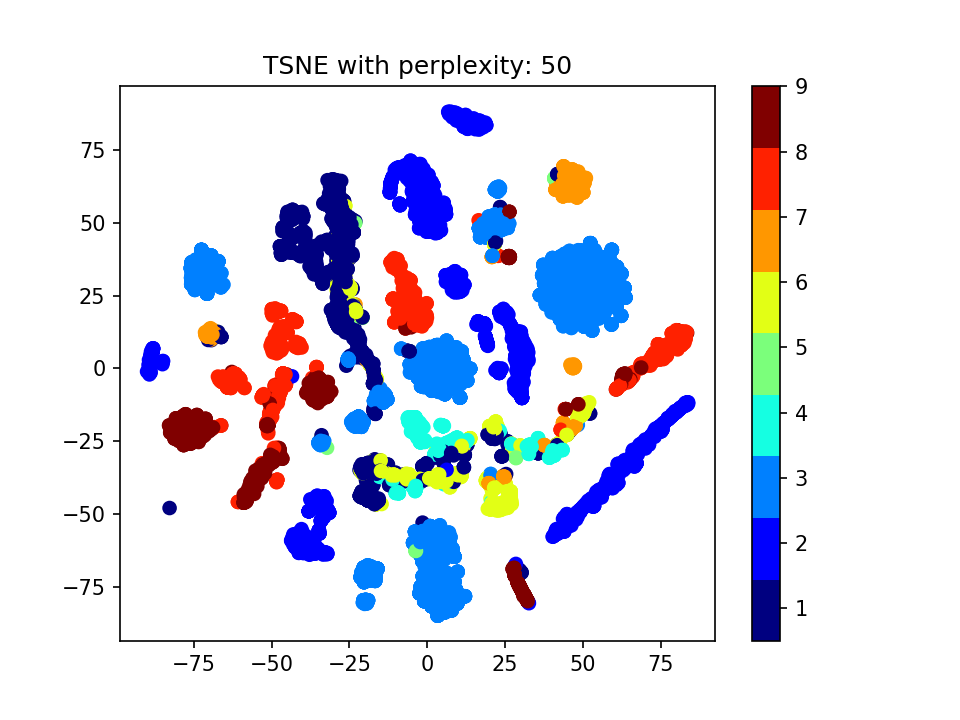

Time in mins:  2.4471030687000015


In [43]:
start = timeit.default_timer()

y_true = pix_bytebigram_df.Class

tsne = TSNE(perplexity=50)
results = tsne.fit_transform(pix_bytebigram_df.drop(['ID','Class'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=y_true, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.title('TSNE with perplexity: 50')
plt.show()

stop = timeit.default_timer()
print('Time in mins: ', (stop - start)/60)

<IPython.core.display.Javascript object>


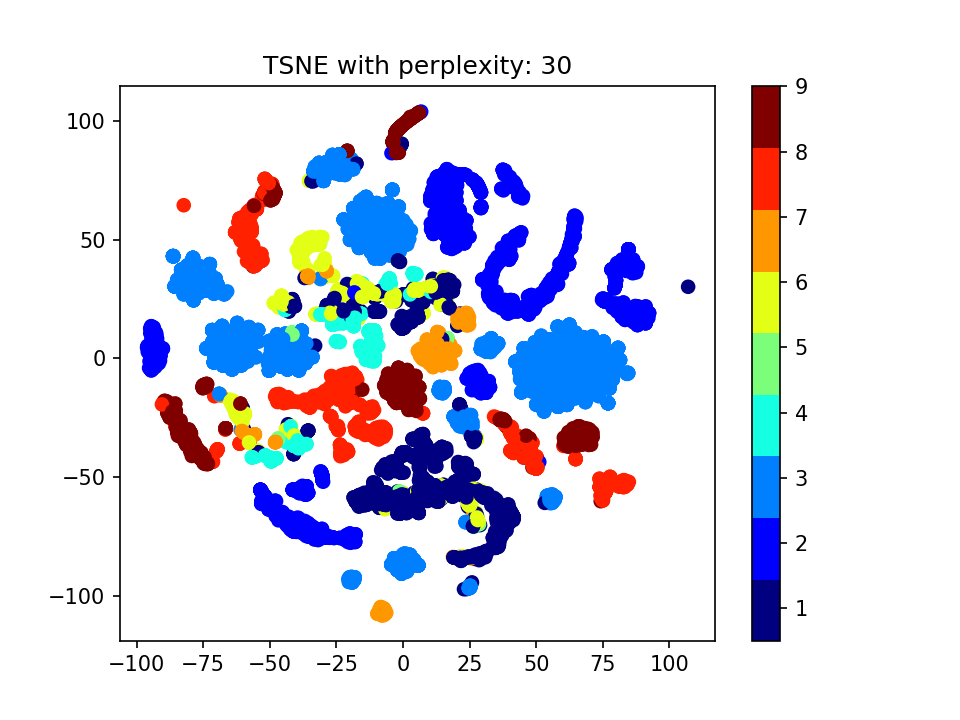

Time in mins:  2.284416813583342


In [44]:
start = timeit.default_timer()

y_true = pix_bytebigram_df.Class

tsne = TSNE(perplexity=30)
results = tsne.fit_transform(pix_bytebigram_df.drop(['ID','Class'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=y_true, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.title('TSNE with perplexity: 30')
plt.show()

stop = timeit.default_timer()
print('Time in mins: ', (stop - start)/60)

### Observations:

- we can see that after combining both our byte bigram and asm pixel intensity features our data looks far more separated than before
- this will certainly increase the performance
- we can still see that label '5' is not much in quantity as compared to other labels and hence it is overlapping with label '6' & '7'

In [46]:
# train test split

y_true_pix_bigram = pix_bytebigram_df.Class

X_train_pix_bi, X_test_pix_bi, y_train_pix_bi, y_test_pix_bi = train_test_split(pix_bytebigram_df.drop(['ID','Class'], axis=1), 
                                                    y_true_pix_bigram, stratify=y_true_pix_bigram,test_size=0.20)

X_train_pix_bi, X_cv_pix_bi, y_train_pix_bi, y_cv_pix_bi = train_test_split(X_train_pix_bi, y_train_pix_bi, 
                                                                            stratify=y_train_pix_bi, test_size=0.20)

In [47]:
# for asm pixel intensity & bytebigrams

print('X_train shape: {0}, y_train: {1}'.format(X_train_pix_bi.shape, y_train_pix_bi.shape))
print('X_cv shape:    {0}, y_cv:    {1}'.format(X_cv_pix_bi.shape, y_cv_pix_bi.shape))
print('X_test shape:  {0}, y_test:  {1}'.format(X_test_pix_bi.shape, y_test_pix_bi.shape))

X_train shape: (6955, 1802), y_train: (6955,)
X_cv shape:    (1739, 1802), y_cv:    (1739,)
X_test shape:  (2174, 1802), y_test:  (2174,)


### Distribution of Classes in Train, CV & Test data of pixel intensity & bytebigram features 

<IPython.core.display.Javascript object>


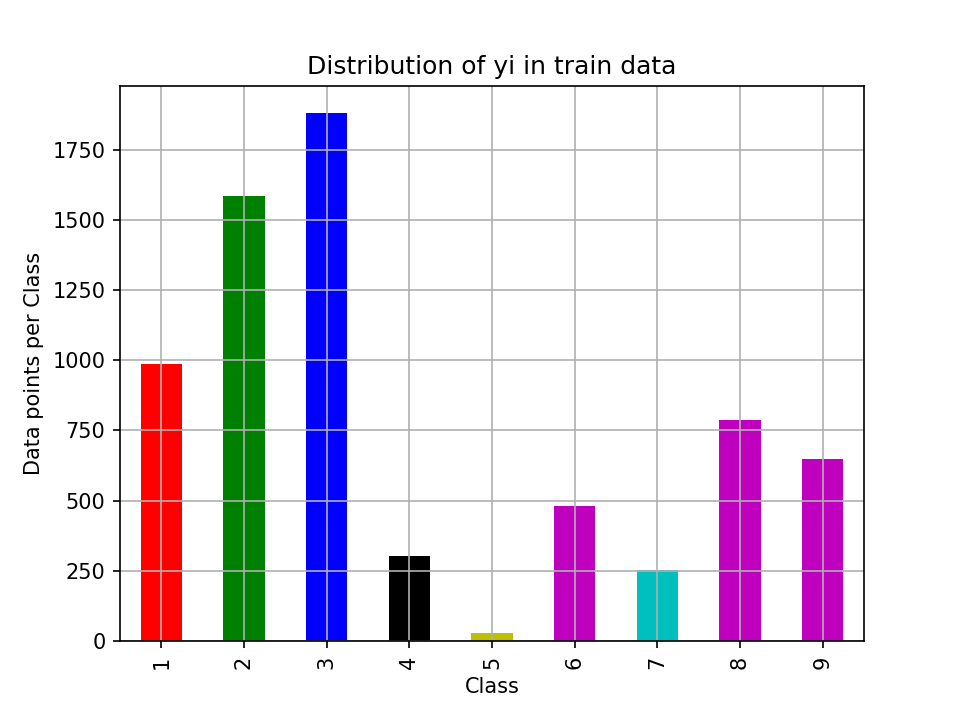

Number of data points in class 3 : 1883 ( 27.074 %)
Number of data points in class 2 : 1586 ( 22.804 %)
Number of data points in class 1 : 986 ( 14.177 %)
Number of data points in class 8 : 786 ( 11.301 %)
Number of data points in class 9 : 648 ( 9.317 %)
Number of data points in class 6 : 481 ( 6.916 %)
Number of data points in class 4 : 304 ( 4.371 %)
Number of data points in class 7 : 254 ( 3.652 %)
Number of data points in class 5 : 27 ( 0.388 %)


In [48]:
train_class_distribution_pix_bi = y_train_pix_bi.value_counts().sort_index()

# my_colors = 'rgbkymc'
my_colors = ['r','g','b','k','y','m','c','m','m']
train_class_distribution_pix_bi.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution_pix_bi.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution_pix_bi.values[i], '(', np.round((train_class_distribution_pix_bi.values[i]/y_train_pix_bi.shape[0]*100), 3), '%)')

<IPython.core.display.Javascript object>


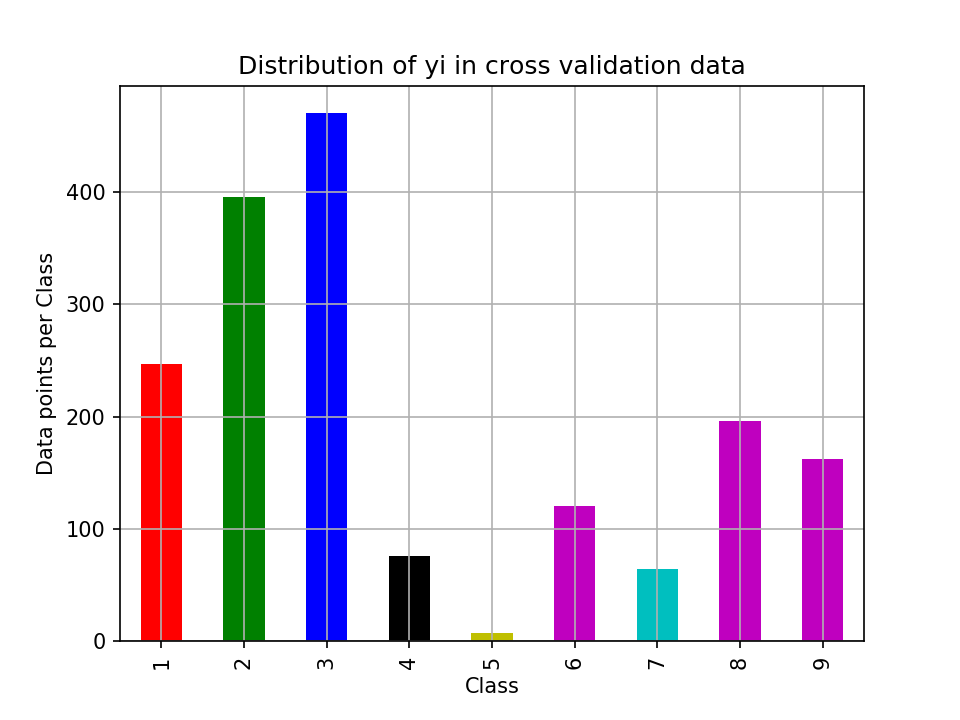

Number of data points in class 3 : 471 ( 27.085 %)
Number of data points in class 2 : 396 ( 22.772 %)
Number of data points in class 1 : 247 ( 14.204 %)
Number of data points in class 8 : 196 ( 11.271 %)
Number of data points in class 9 : 162 ( 9.316 %)
Number of data points in class 6 : 120 ( 6.901 %)
Number of data points in class 4 : 76 ( 4.37 %)
Number of data points in class 7 : 64 ( 3.68 %)
Number of data points in class 5 : 7 ( 0.403 %)


In [50]:
cv_class_distribution_pix_bi = y_cv_pix_bi.value_counts().sort_index()

cv_class_distribution_pix_bi.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-cv_class_distribution_pix_bi.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution_pix_bi.values[i], '(', np.round((cv_class_distribution_pix_bi.values[i]/y_cv_pix_bi.shape[0]*100), 3), '%)')

<IPython.core.display.Javascript object>


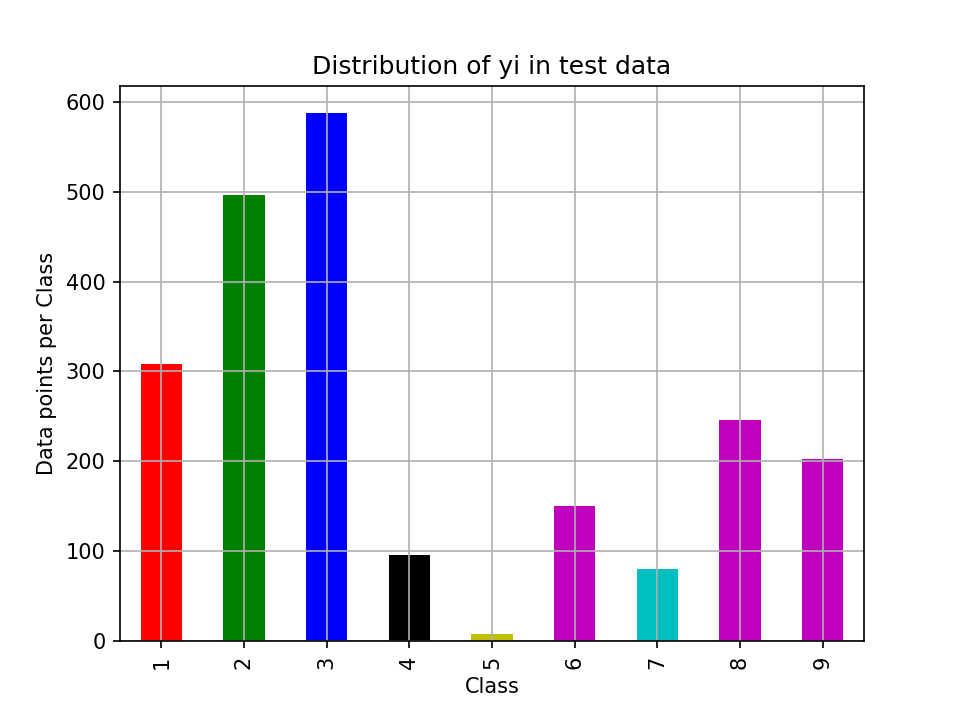

Number of data points in class 3 : 588 ( 27.047 %)
Number of data points in class 2 : 496 ( 22.815 %)
Number of data points in class 1 : 308 ( 14.167 %)
Number of data points in class 8 : 246 ( 11.316 %)
Number of data points in class 9 : 203 ( 9.338 %)
Number of data points in class 6 : 150 ( 6.9 %)
Number of data points in class 4 : 95 ( 4.37 %)
Number of data points in class 7 : 80 ( 3.68 %)
Number of data points in class 5 : 8 ( 0.368 %)


In [52]:
test_class_distribution_pix_bi = y_test_pix_bi.value_counts().sort_index()

test_class_distribution_pix_bi.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution_pix_bi.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution_pix_bi.values[i], '(', np.round((test_class_distribution_pix_bi.values[i]/y_test_pix_bi.shape[0]*100), 3), '%)')

### RandomForrest on asm pixel intensity & bytebigrams features 

Running model:  1
Running model:  2
Running model:  3
Running model:  4
Running model:  5
Running model:  6
Running model:  7
All models done

log_loss for c =  10 is 0.031485301286857004
log_loss for c =  50 is 0.02480434203702758
log_loss for c =  100 is 0.024583209340672423
log_loss for c =  500 is 0.023592127440817717
log_loss for c =  1000 is 0.023856571736845418
log_loss for c =  2000 is 0.023650132645862066
log_loss for c =  3000 is 0.02373142965520453


<IPython.core.display.Javascript object>


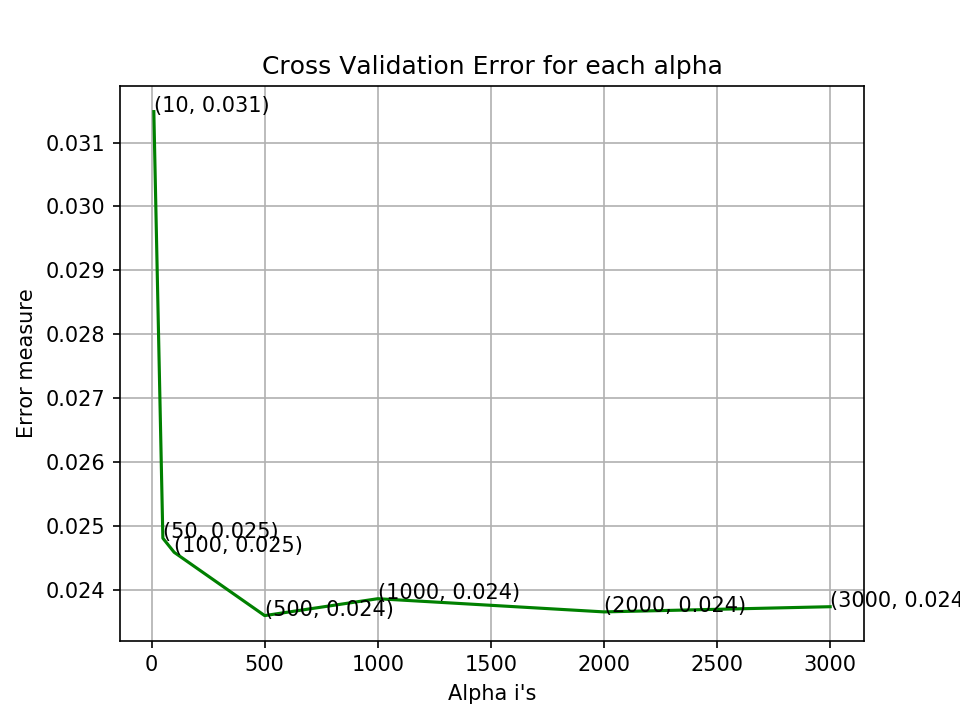

Time in mins:  3.1230477965833265


In [54]:
start = timeit.default_timer()


alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]


count = 1
for i in alpha:
    print('Running model: ',count)
    count += 1 
    clf = RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    clf.fit(X_train_pix_bi, y_train_pix_bi)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_pix_bi, y_train_pix_bi)
    predict_y = sig_clf.predict_proba(X_cv_pix_bi)
    cv_log_error_array.append(log_loss(y_cv_pix_bi, predict_y, labels=clf.classes_, eps=1e-15))

print('All models done')
print()

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha_rf_pix_bi = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

stop = timeit.default_timer()
print('Time in mins: ',(stop - start)/60)

For values of best alpha =  500 The train log loss is: 0.009929183784793285
For values of best alpha =  500 The cross validation log loss is: 0.023592127440817717
For values of best alpha =  500 The test log loss is: 0.01858246873448593
Number of misclassified points  0.41398344066237347
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


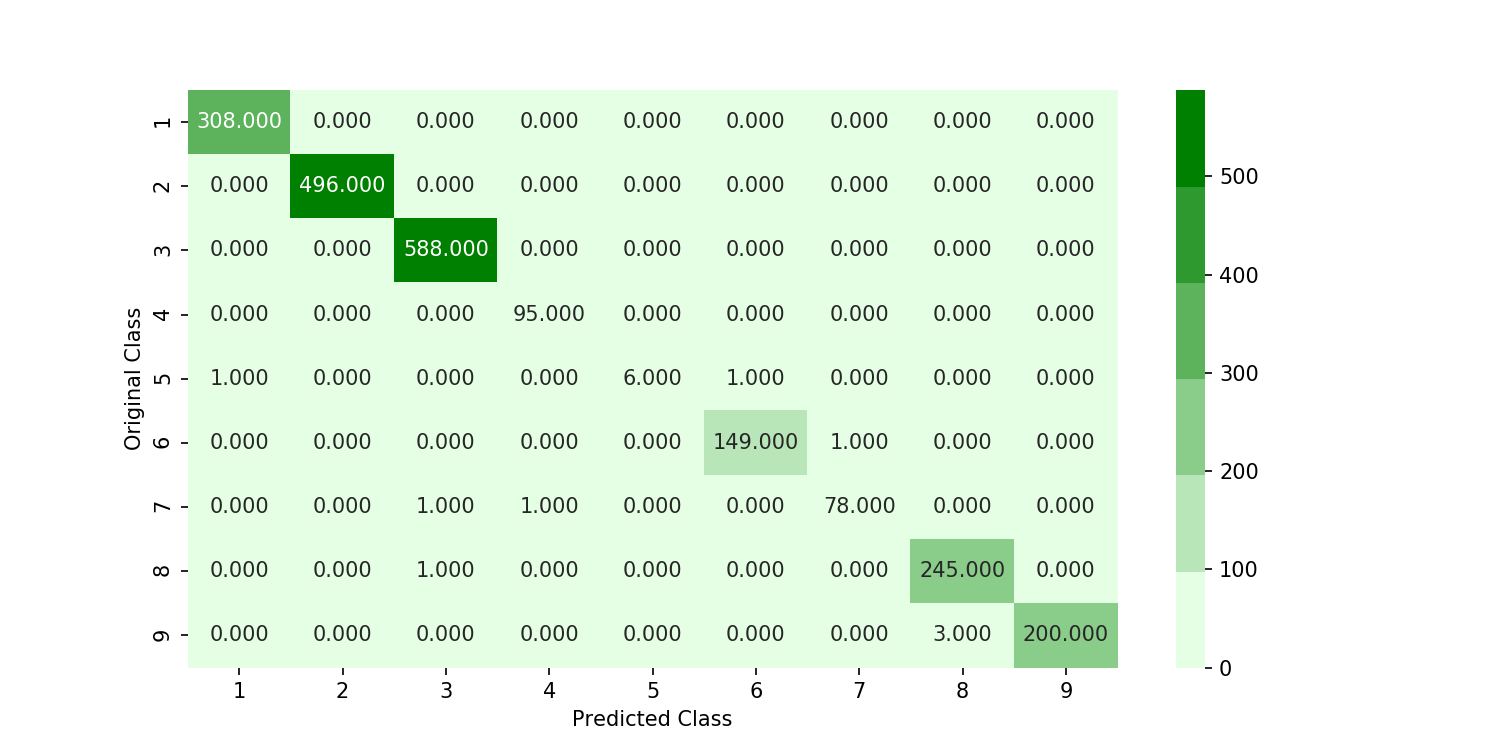

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


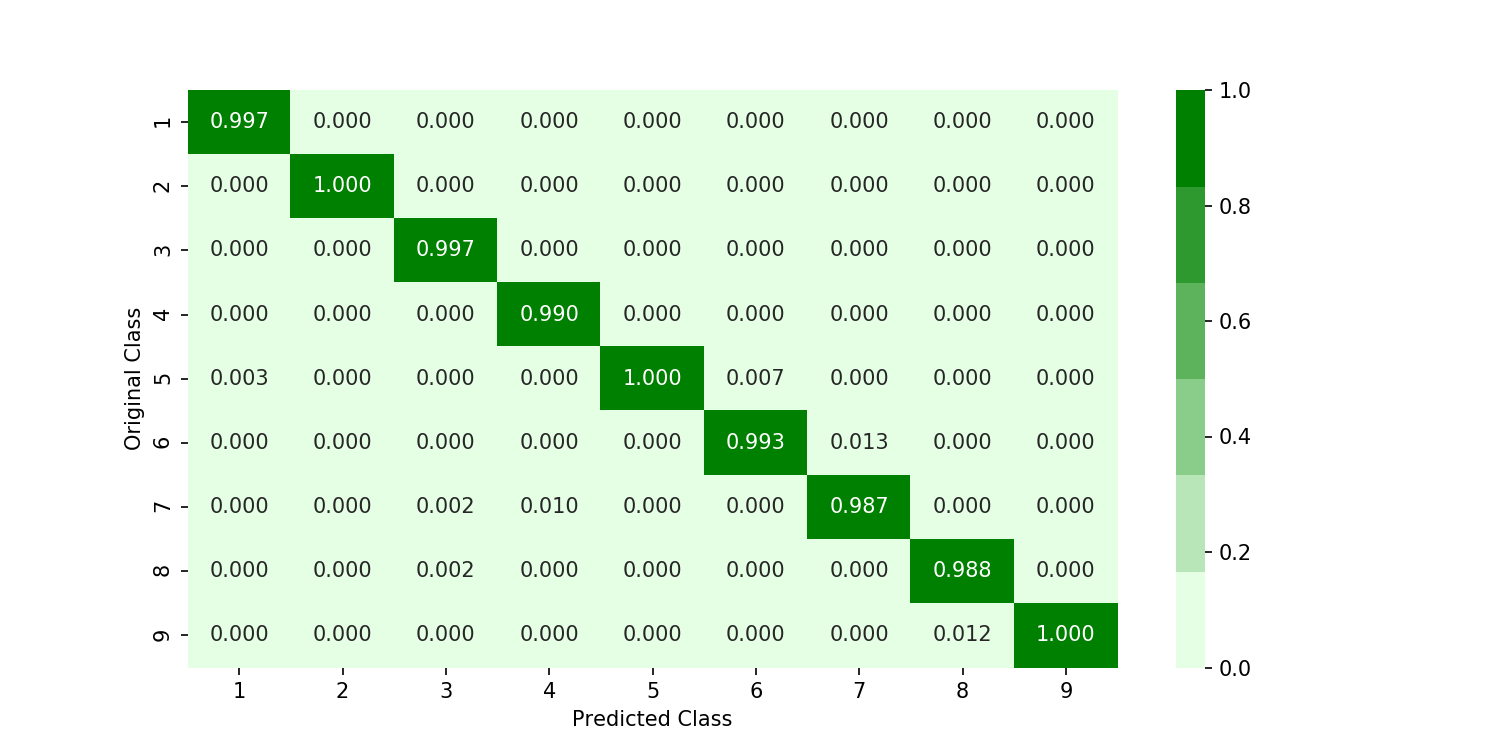

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


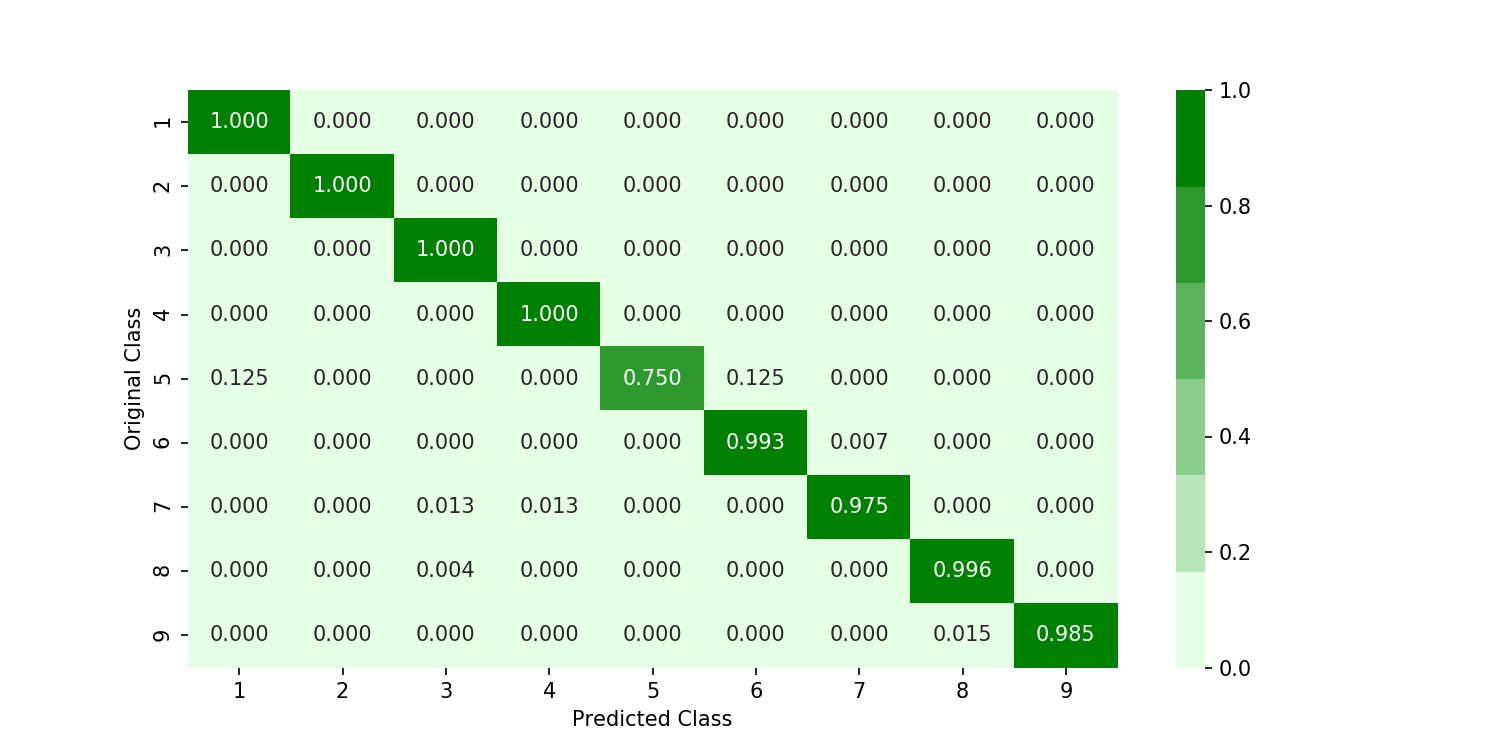

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]

Time in mins:  0.3136263887333371


In [57]:
# running on the best model

start = timeit.default_timer()

best_model = RandomForestClassifier(n_estimators=alpha[best_alpha_rf_pix_bi], random_state=42, n_jobs=-1)
best_model.fit(X_train_pix_bi, y_train_pix_bi)
sig_clf = CalibratedClassifierCV(best_model, method="sigmoid")
sig_clf.fit(X_train_pix_bi, y_train_pix_bi)

predict_y = sig_clf.predict_proba(X_train_pix_bi)
print('For values of best alpha = ', alpha[best_alpha_rf_pix_bi], "The train log loss is:",log_loss(y_train_pix_bi, predict_y))
predict_y = sig_clf.predict_proba(X_cv_pix_bi)
print('For values of best alpha = ', alpha[best_alpha_rf_pix_bi], "The cross validation log loss is:",log_loss(y_cv_pix_bi, predict_y))
predict_y = sig_clf.predict_proba(X_test_pix_bi)
print('For values of best alpha = ', alpha[best_alpha_rf_pix_bi], "The test log loss is:",log_loss(y_test_pix_bi, predict_y))
plot_confusion_matrix(y_test_pix_bi, sig_clf.predict(X_test_pix_bi))

print()
stop = timeit.default_timer()
print('Time in mins: ',(stop - start)/60)

### XGBoost on asm pixel intensity & bytebigram features 

In [59]:
# hyperparameter tuning
start = timeit.default_timer()

params={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}

clf = XGBClassifier()
RSxgb_clf = RandomizedSearchCV(clf, params, verbose=10, n_jobs=-1)
RSxgb_clf.fit(X_train_pix_bi, y_train_pix_bi)

stop = timeit.default_timer()
print()
print('Time in mins: ', (stop - start)/60)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed: 31.9min remaining: 18.5min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed: 44.4min remaining: 13.5min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 50.6min remaining:  5.6min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 60.7min finished


KeyboardInterrupt: 

In [62]:
print('best params xgboost for pixel instensity and bytebigrams: ', RSxgb_clf.best_params_)

best params xgboost for pixel instensity and bytebigrams:  {'max_depth': 10, 'learning_rate': 0.15, 'colsample_bytree': 0.5, 'subsample': 0.5, 'n_estimators': 2000}


xgb model fit done 

calib model fit done 

train loss 0.009195566447267106
cv loss 0.028380470982419085
test loss 0.017231784535916037
Number of misclassified points  0.27598896044158233
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


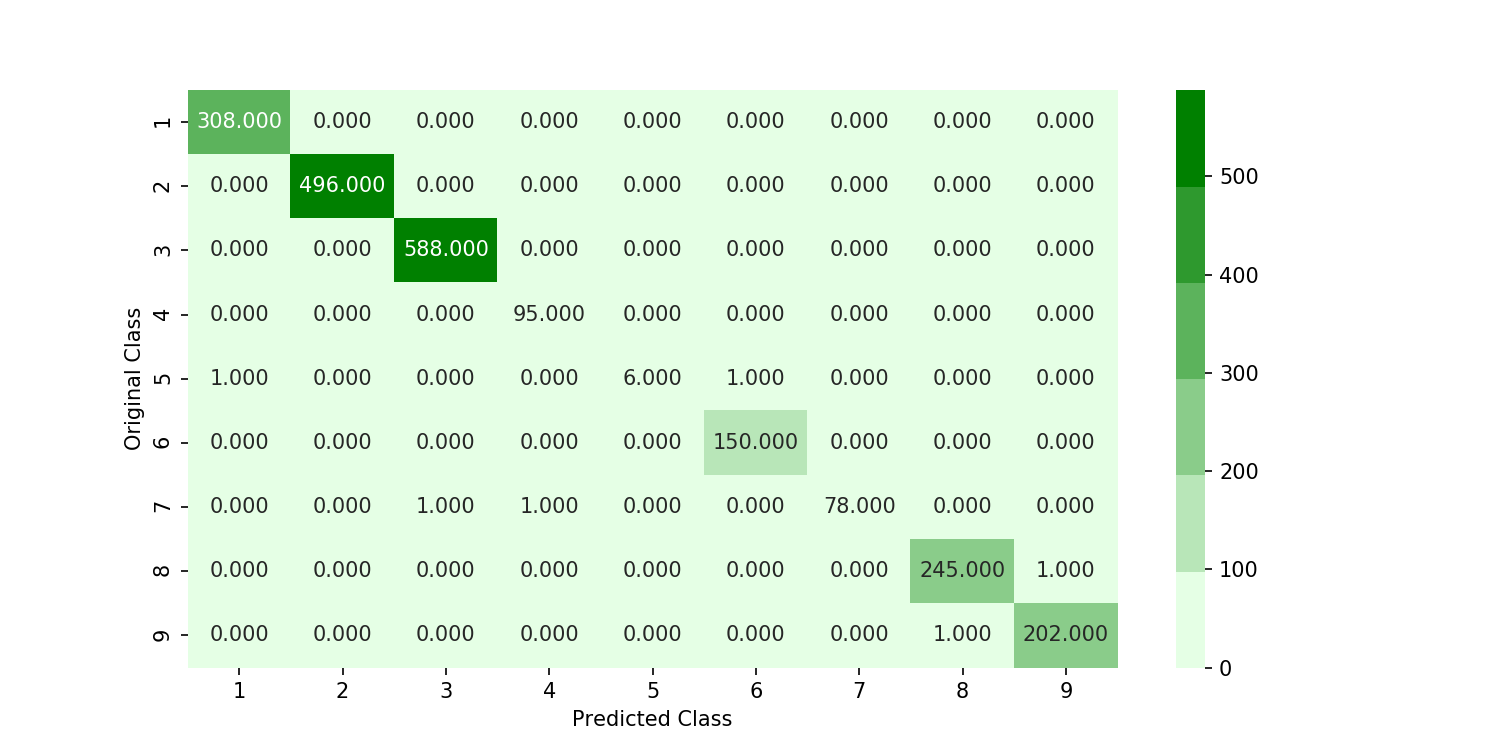

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


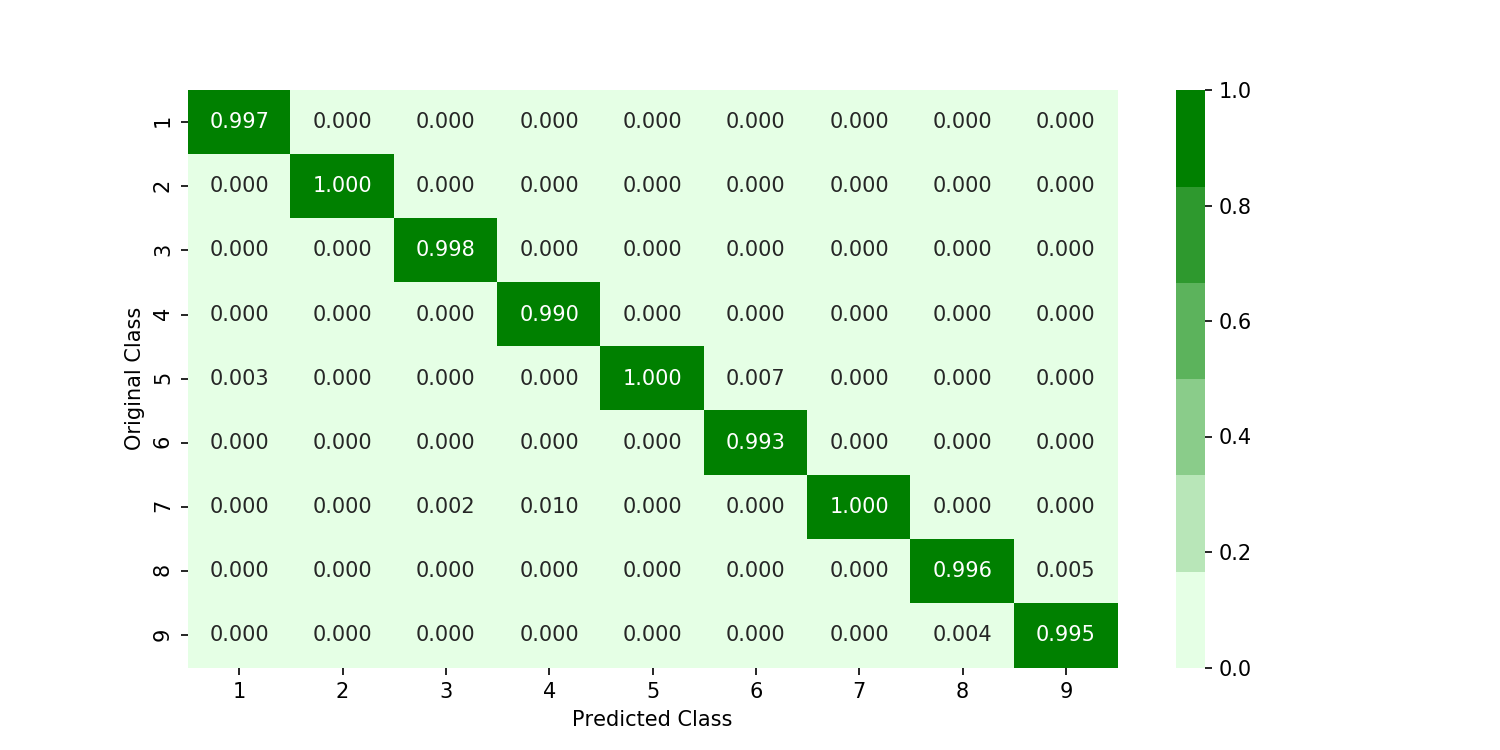

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


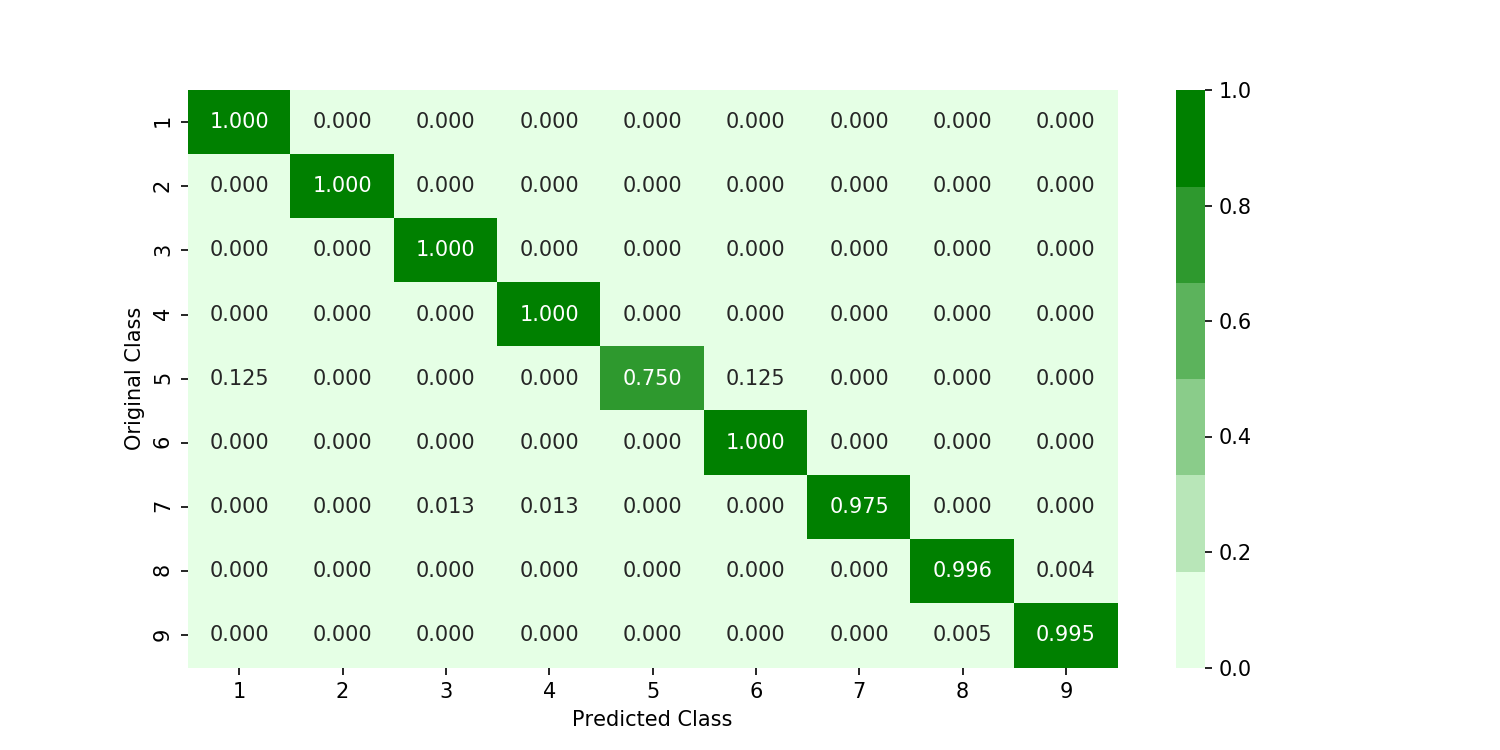

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]

Time in mins:  71.49615589866666


In [66]:
start = timeit.default_timer()

best_model_xgb_pix_bi = XGBClassifier(colsample_bytree=0.5, learning_rate=0.15, max_depth=10, n_estimators= 2000, subsample=0.5, n_thread=-1)
best_model_xgb_pix_bi.fit(X_train_pix_bi, y_train_pix_bi)
print('xgb model fit done \n')
sig_clf = CalibratedClassifierCV(best_model_xgb_pix_bi, method="sigmoid")
sig_clf.fit(X_train_pix_bi, y_train_pix_bi)
print('calib model fit done \n')

predict_y = sig_clf.predict_proba(X_train_pix_bi)
print ('train loss',log_loss(y_train_pix_bi, predict_y))
predict_y = sig_clf.predict_proba(X_cv_pix_bi)
print ('cv loss',log_loss(y_cv_pix_bi, predict_y))
predict_y = sig_clf.predict_proba(X_test_pix_bi)
print ('test loss',log_loss(y_test_pix_bi, predict_y))
plot_confusion_matrix(y_test_pix_bi, sig_clf.predict(X_test_pix_bi))

print()
stop = timeit.default_timer()
print('Time in mins: ',(stop - start)/60)

## Summary 

In [72]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ['Model', 'Features', 'Test Log-Loss', 'Time Taken']

x.add_row(['RandomForrest', 'Byte Bigrams', 0.0375, '1 min 32 sec'])
x.add_row(['XGBoost', 'Byte Bigrams', 0.0447, '44 min 66 sec'])
x.add_row(['RandomForrest', 'ASM Pixel intensity & Byte Bigrams', 0.0185, '33 sec'])
x.add_row(['XGBoost', 'ASM Pixel intensity & Byte Bigrams', 0.0172, '71 min 32 sec'])

print(x)

+---------------+------------------------------------+---------------+---------------+
|     Model     |              Features              | Test Log-Loss |   Time Taken  |
+---------------+------------------------------------+---------------+---------------+
| RandomForrest |            Byte Bigrams            |     0.0375    |  1 min 32 sec |
|    XGBoost    |            Byte Bigrams            |     0.0447    | 44 min 66 sec |
| RandomForrest | ASM Pixel intensity & Byte Bigrams |     0.0185    |     33 sec    |
|    XGBoost    | ASM Pixel intensity & Byte Bigrams |     0.0172    | 71 min 32 sec |
+---------------+------------------------------------+---------------+---------------+


## Conclusion

- The last log-loss in the instructions notebook was 0.0317 
- We have reduced our initial loss of 0.0375 to 0.0172
- This shows that our model is performing very good with Pixel intensity features and hence it is one of the golden features
- RandomForrest model takes very less time as compared to XGBoost and it's performance is not that different from XGBoost model 
- hence for low latency requirements RandomForrest model is the best